# Correlogram Analysis

This notebook analyzes the results from correlogram experiments.

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Define problem ordering
problem_ordering = [
    'OneMax', 
    #'HelloWorld', 
    'Sphere',
    #'TSP', 
    #'NeuralNetwork',
    'BFS-CNF',
    'BFS-Full', 
    'BFS-EvenParity',
    #'GrammaticalEvolution', 
    ]

## 1. Summary Statistics from Main Results

Read the main CSV results file and create a grouped summary table.

In [251]:
# Read main results file
df = pd.read_csv('outputs/results_2026_01_07_correlogram.csv')
df.head()

Unnamed: 0 problem  size size_cat       solver  budget dist_type name_type  \
0           0  OneMax    10    small  correlogram   10000    coarse       lin   
1           1  OneMax    10    small  correlogram   10000    coarse       str   
2           2  OneMax    50   medium  correlogram   50000    coarse       lin   
3           3  OneMax    50   medium  correlogram   50000    coarse       str   
4           4  OneMax   100    large  correlogram  200000    coarse       lin   

  generator  rep    elapsed  cor_length  onestep_cor  diameter  \
0   one-max    0   8.342589    4.881086     0.644530      9.94   
1   one-max    0   6.721782    4.881086     0.644530      9.94   
2   one-max    0  28.346206   20.794749     0.782349     50.40   
3   one-max    0  27.238523   20.794749     0.782349     50.40   
4   one-max    0  58.124361   20.819398     0.724333    100.30   

   sr_structural_change_cor  sr_average_parent_length  g_avg_dist  \
0                       0.0                       0.0    4.980751   
1                       0.0                       0.0    4.980751   
2                       0.0                       0.0   24.571822   
3                       0.0                       0.0   24.571822   
4                       0.0                       0.0   49.078176   

   g_total_var  g_norm_corr_length  g_nugget  
0     2.115591            2.007729         0  
1     2.115591            2.007729         0  
2    15.224975            1.627881         0  
3    15.224975            1.627881         0  
4    17.589975            1.344707         0

In [252]:
# Create groupby table across problem / size / dist_type / name_type
# Note: The main results file should have columns for diameter, cor_length, and onestep_cor
# If there are multiple reps, we'll aggregate (mean)

groupby_cols = ['problem', 'size', 'dist_type', 'name_type', 'generator']

summary_cols = ['diameter', 'cor_length', 'onestep_cor', 'sr_structural_change_cor', 'sr_average_parent_length']

summary_table = df.groupby(groupby_cols)[summary_cols].mean()

# Apply problem ordering
summary_table = summary_table.reset_index()
summary_table['problem'] = pd.Categorical(summary_table['problem'], categories=problem_ordering, ordered=True)
summary_table = summary_table.sort_values(['problem', 'size', 'dist_type', 'name_type'])
summary_table = summary_table.set_index(groupby_cols)

summary_table

diameter  cor_length  \
problem        size dist_type name_type generator                              
OneMax         10   coarse    lin       one-max         9.940000    4.881086   
                              str       one-max         9.940000    4.881086   
               50   coarse    lin       one-max        50.400000   20.794749   
                              str       one-max        50.400000   20.794749   
               100  coarse    lin       one-max       100.300000   20.819398   
                              str       one-max       100.300000   20.819398   
BFS-CNF        6    coarse    lin       sr-depth-gen   25.430000    3.790421   
                              str       sr-depth-gen   31.580000    4.707774   
               12   coarse    lin       sr-depth-gen   40.591429    3.995514   
                              str       sr-depth-gen   50.853333   11.927689   
               18   coarse    lin       sr-depth-gen   61.984000    4.411248   
                              str       sr-depth-gen   81.629333   19.195773   
BFS-Full       6    coarse    lin       sr-depth-gen   25.430000    3.720191   
                              str       sr-depth-gen   31.580000    4.664113   
               12   coarse    lin       sr-depth-gen   40.591429   14.175780   
                              str       sr-depth-gen   50.853333    4.988025   
               18   coarse    lin       sr-depth-gen   61.984000   13.678137   
                              str       sr-depth-gen   81.629333   20.830820   
BFS-EvenParity 6    coarse    lin       sr-depth-gen   25.430000    3.438931   
                              str       sr-depth-gen   31.580000    4.810915   
               12   coarse    lin       sr-depth-gen   40.591429    3.999136   
                              str       sr-depth-gen   50.853333    4.915793   
               18   coarse    lin       sr-depth-gen   61.984000   13.868109   
                              str       sr-depth-gen   81.629333   14.846487   

                                                      onestep_cor  \
problem        size dist_type name_type generator                   
OneMax         10   coarse    lin       one-max          0.644530   
                              str       one-max          0.644530   
               50   coarse    lin       one-max          0.782349   
                              str       one-max          0.782349   
               100  coarse    lin       one-max          0.724333   
                              str       one-max          0.724333   
BFS-CNF        6    coarse    lin       sr-depth-gen     0.542958   
                              str       sr-depth-gen     0.604059   
               12   coarse    lin       sr-depth-gen     0.524947   
                              str       sr-depth-gen     0.575421   
               18   coarse    lin       sr-depth-gen     0.536683   
                              str       sr-depth-gen     0.577383   
BFS-Full       6    coarse    lin       sr-depth-gen     0.555744   
                              str       sr-depth-gen     0.624279   
               12   coarse    lin       sr-depth-gen     0.575875   
                              str       sr-depth-gen     0.592077   
               18   coarse    lin       sr-depth-gen     0.662954   
                              str       sr-depth-gen     0.721611   
BFS-EvenParity 6    coarse    lin       sr-depth-gen     0.476917   
                              str       sr-depth-gen     0.529799   
               12   coarse    lin       sr-depth-gen     0.412572   
                              str       sr-depth-gen     0.509306   
               18   coarse    lin       sr-depth-gen     0.538505   
                              str       sr-depth-gen     0.610786   

                                                      sr_structural_change_cor  \
problem        size dist_type name_type generator                                
OneMax         1

In [253]:
# Save the summary table to CSV
summary_table.to_csv('outputs/correlogram_summary_table.csv')
print("Summary table saved to outputs/correlogram_summary_table.csv")

# Export to LaTeX
latex_str = summary_table.to_latex(float_format="%.3f")
with open('outputs/correlogram_summary_table.tex', 'w') as f:
    f.write(latex_str)
print("Summary table saved to outputs/correlogram_summary_table.tex")

Summary table saved to outputs/correlogram_summary_table.csv
Summary table saved to outputs/correlogram_summary_table.tex


## 2. Plot Correlogram Curves

Read each xy results file and create plots in PDF format.

In [254]:
# Find all xy CSV files
xy_files = glob.glob('outputs/results_2026_01_07_correlogram_xy_*.csv')
print(f"Found {len(xy_files)} xy files to plot")

Found 30 xy files to plot


In [255]:
len(xy_files)

30

In [256]:
sorted(xy_files)

['outputs/results_2026_01_07_correlogram_xy_BFS-CNF_12_medium_50000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_12_medium_50000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_18_large_200000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_18_large_200000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_6_small_10000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_6_small_10000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_12_medium_50000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_12_medium_50000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_18_large_200000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenPari

In [257]:
# Create plots for each xy file and save as PDF
for xy_file in xy_files:
    # Read the xy data
    xy_df = pd.read_csv(xy_file)
    
    # Extract metadata from filename
    # Format: results_2026_01_07_correlogram_xy_{problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_rep{rep}.csv
    filename = Path(xy_file).stem
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Log-scaled marker sizes based on n_axis
    if 'n_axis' in xy_df.columns:
        marker_sizes = np.log10(xy_df['n_axis'] + 1) * 30
    else:
        marker_sizes = 50  # default if n_axis not available
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(xy_df['x_axis'], xy_df['y_axis'], s=marker_sizes, alpha=0.7, edgecolors='black', linewidth=0.5)
    plt.plot(xy_df['x_axis'], xy_df['y_axis'], linestyle='-', linewidth=1, alpha=0.4, color='gray')
    plt.xlabel('Distance', fontsize=12)
    plt.ylabel('Correlation', fontsize=12)
    plt.title(filename.replace('results_2026_01_07_correlogram_xy_', '').replace('_', ' '), fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    # Add legend for marker sizes if n_axis is available
    if 'n_axis' in xy_df.columns:
        from matplotlib.lines import Line2D
        n_min, n_max = xy_df['n_axis'].min(), xy_df['n_axis'].max()
        n_reference = [10, 100, 1000, 10000, 100000]
        n_reference = [n for n in n_reference if n_min <= n <= n_max]
        if len(n_reference) > 0:
            legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                      markerfacecolor='gray', 
                                      markersize=np.sqrt(np.log10(n+1)*30/np.pi),
                                      label=f'n={n:,}') 
                               for n in n_reference]
            plt.legend(handles=legend_elements, title='Pairs per bin', loc='best', framealpha=0.9, fontsize=9)
        
        # Add text showing range
        plt.text(0.02, 0.98, f'n range: {int(n_min):,}-{int(n_max):,}', 
                 transform=plt.gca().transAxes, 
                 verticalalignment='top',
                 fontsize=8,
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    # Save as PDF
    pdf_filename = xy_file.replace('.csv', '.pdf')
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
print(f"Created {len(xy_files)} PDF plots")

Created 30 PDF plots


## 3. Summary Statistics by Problem Type

Additional analysis grouping by different dimensions.

## 2b. Display Correlogram Plots in Grid

Display all correlogram plots in a grid layout within the notebook.

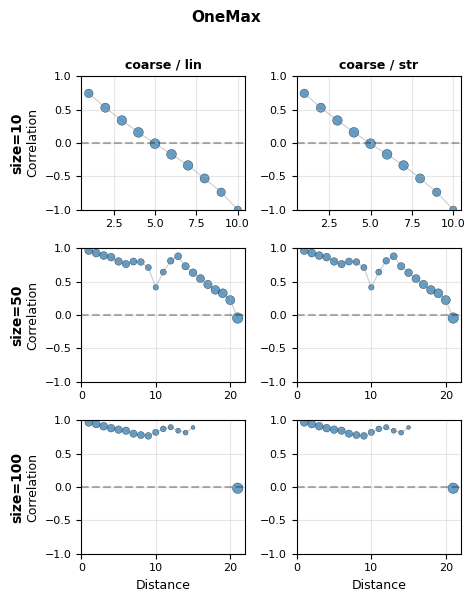

Created grid for OneMax with 3 sizes: [10, 50, 100]


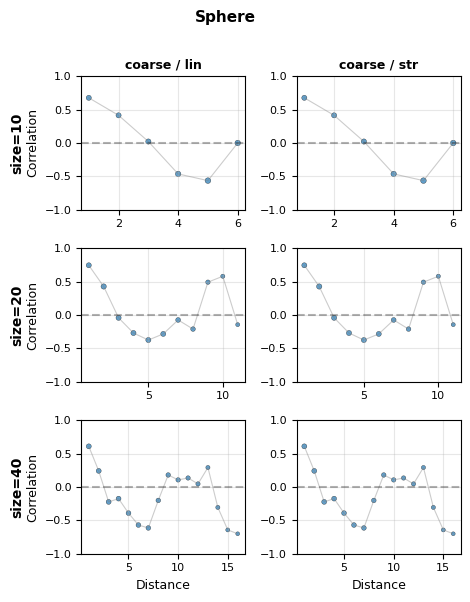

Created grid for Sphere with 3 sizes: [10, 20, 40]


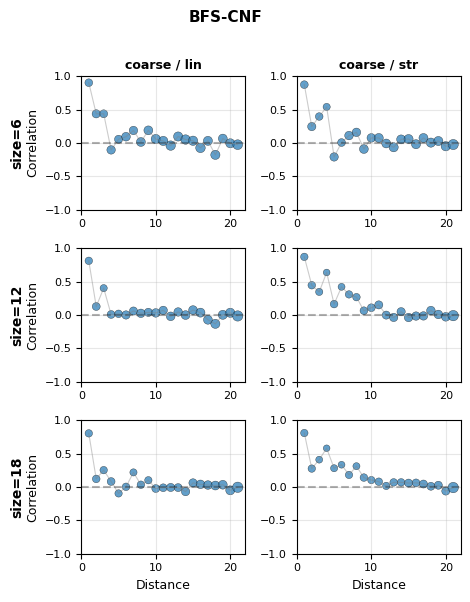

Created grid for BFS-CNF with 3 sizes: [6, 12, 18]


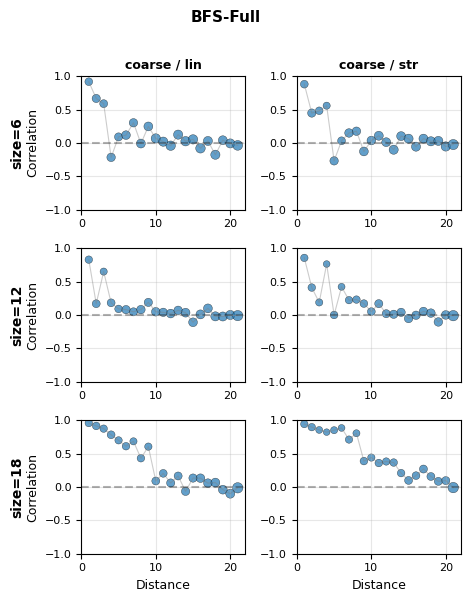

Created grid for BFS-Full with 3 sizes: [6, 12, 18]


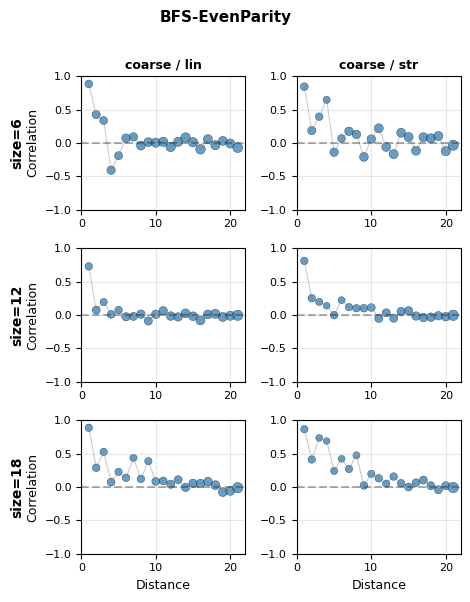

Created grid for BFS-EvenParity with 3 sizes: [6, 12, 18]
Created grids for 5 problems


In [258]:
# Create a grid of plots - one grid per problem
# Within each grid: rows = problem sizes, columns = name_type x dist_type

# Parse filenames to get metadata
plot_data = []
for xy_file in xy_files:
    filename = Path(xy_file).stem
    # Extract parts from filename
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Parse: {problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_{generator}_rep{rep}
    try:
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        budget = int(parts[3])
        dist_type = parts[4]
        name_type = parts[5]
        generator = parts[6]
        rep = parts[7].replace('rep', '')
        
        plot_data.append({
            'file': xy_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'rep': rep
        })
    except:
        print(f"Warning: Could not parse {filename}")

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)
plot_df['problem'] = pd.Categorical(plot_df['problem'], categories=problem_ordering, ordered=True)
plot_df = plot_df.sort_values(['problem', 'size', 'dist_type', 'name_type'])

# Get unique problems and combinations
problems = plot_df['problem'].unique()
dist_types = sorted(plot_df['dist_type'].unique())
name_types = sorted(plot_df['name_type'].unique())

# Create column labels for all combinations of dist_type x name_type
columns = [(dt, nt) for dt in dist_types for nt in name_types]

# Create one grid per problem
for problem in problems:
    problem_df = plot_df[plot_df['problem'] == problem]
    
    if len(problem_df) == 0:
        continue
    
    # Get sizes that actually exist for this problem
    sizes = sorted(problem_df['size'].unique())
    
    # Determine grid dimensions
    n_rows = len(sizes)
    n_cols = len(columns)
    
    # Create figure with smaller size - better for papers
    # Each subplot is 2.5" x 2" instead of 5" x 4"
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2*n_rows))
    
    # Handle case of single row or column
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    fig.suptitle(f'{problem}', fontsize=11, fontweight='bold', y=0.995)
    
    # Plot each cell
    for row_idx, size in enumerate(sizes):
        for col_idx, (dist_type, name_type) in enumerate(columns):
            ax = axes[row_idx, col_idx]
            ax.set_ylim(-1, 1)
            
            # Find the matching file
            matching = problem_df[
                (problem_df['size'] == size) & 
                (problem_df['dist_type'] == dist_type) & 
                (problem_df['name_type'] == name_type)
            ]
            
            if len(matching) > 0:
                # Read the xy data
                xy_df = pd.read_csv(matching.iloc[0]['file'])
                
                # Log-scaled marker sizes based on n_axis (smaller for smaller figure)
                if 'n_axis' in xy_df.columns:
                    marker_sizes = np.log10(xy_df['n_axis'] + 1) * 10
                else:
                    marker_sizes = 15
                
                # Plot
                ax.scatter(xy_df['x_axis'], xy_df['y_axis'], s=marker_sizes, alpha=0.7, 
                          edgecolors='black', linewidth=0.3)
                ax.plot(xy_df['x_axis'], xy_df['y_axis'], linestyle='-', linewidth=0.8, 
                       alpha=0.4, color='gray')
            else:
                # No data for this combination (shouldn't happen now, but keep as fallback)
                ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                       ha='center', va='center', fontsize=8, color='gray')
            
            # Formatting
            ax.grid(True, alpha=0.3)
            ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
            
            # Labels with appropriate font sizes for smaller figure
            if row_idx == n_rows - 1:
                ax.set_xlabel('Distance', fontsize=9)
            if col_idx == 0:
                ax.set_ylabel('Correlation', fontsize=9)
            
            # Tick label sizes
            ax.tick_params(axis='both', labelsize=8)
            
            # Row labels (size)
            if col_idx == 0:
                ax.text(-0.35, 0.5, f'size={size}', transform=ax.transAxes,
                       fontsize=10, va='center', ha='right', fontweight='bold',
                       rotation=90)
            
            # Column labels (dist_type, name_type)
            if row_idx == 0:
                ax.set_title(f'{dist_type} / {name_type}', fontsize=9, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'outputs/correlogram_grid_{problem}.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"Created grid for {problem} with {len(sizes)} sizes: {sizes}")

print(f"Created grids for {len(problems)} problems")

In [259]:
# Group by problem only
by_problem = df.groupby('problem')[summary_cols].mean()
print("\nMean values by problem:")
by_problem


Mean values by problem:


diameter  cor_length  onestep_cor  sr_structural_change_cor  \
problem                                                                        
BFS-CNF         48.678016    8.004736     0.560242                  0.339064   
BFS-EvenParity  48.678016    7.646562     0.512981                  0.290235   
BFS-Full        48.678016   10.342844     0.622090                  0.495626   
OneMax          53.546667   15.498411     0.717071                  0.000000   

                sr_average_parent_length  
problem                                   
BFS-CNF                          15.6523  
BFS-EvenParity                   15.6523  
BFS-Full                         15.6523  
OneMax                            0.0000

In [260]:
# Group by size only
by_size = df.groupby('size')[summary_cols].mean()
print("\nMean values by size:")
by_size


Mean values by size:


diameter  cor_length  onestep_cor  sr_structural_change_cor  \
size                                                                  
6      28.505000    4.188724     0.555626                  0.383082   
10      9.940000    4.881086     0.644530                  0.000000   
12     45.722381    7.333656     0.531700                  0.280908   
18     71.806667   14.471762     0.607987                  0.460936   
50     50.400000   20.794749     0.782349                  0.000000   
100   100.300000   20.819398     0.724333                  0.000000   

      sr_average_parent_length  
size                            
6                       9.5688  
10                      0.0000  
12                     14.8008  
18                     22.5873  
50                      0.0000  
100                     0.0000

In [261]:
# Group by dist_type and name_type
by_type = df.groupby(['dist_type', 'name_type'])[summary_cols].mean()
print("\nMean values by dist_type and name_type:")
by_type


Mean values by dist_type and name_type:


diameter  cor_length  onestep_cor  \
dist_type name_type                                       
coarse    lin        45.388024    9.297725     0.581531   
          str        54.402333   11.448552     0.624661   

                     sr_structural_change_cor  sr_average_parent_length  
dist_type name_type                                                      
coarse    lin                        0.221077                  11.75485  
          str                        0.341386                  11.72360

In [262]:
# Group by problem, size, and name_type
groupby_cols = ['problem', 'size', 'name_type']
summary_cols = ['diameter', 'cor_length', 'onestep_cor', 'sr_structural_change_cor', 'sr_average_parent_length']

correlation_summary = df.groupby(groupby_cols)[summary_cols].mean()

# Apply problem ordering
correlation_summary = correlation_summary.reset_index()
correlation_summary['problem'] = pd.Categorical(correlation_summary['problem'], categories=problem_ordering, ordered=True)
correlation_summary = correlation_summary.sort_values(['problem', 'size', 'name_type'])
correlation_summary = correlation_summary.set_index(groupby_cols)

correlation_summary

diameter  cor_length  onestep_cor  \
problem        size name_type                                        
OneMax         10   lin          9.940000    4.881086     0.644530   
                    str          9.940000    4.881086     0.644530   
               50   lin         50.400000   20.794749     0.782349   
                    str         50.400000   20.794749     0.782349   
               100  lin        100.300000   20.819398     0.724333   
                    str        100.300000   20.819398     0.724333   
BFS-CNF        6    lin         25.430000    3.790421     0.542958   
                    str         31.580000    4.707774     0.604059   
               12   lin         40.591429    3.995514     0.524947   
                    str         50.853333   11.927689     0.575421   
               18   lin         61.984000    4.411248     0.536683   
                    str         81.629333   19.195773     0.577383   
BFS-Full       6    lin         25.430000    3.720191     0.555744   
                    str         31.580000    4.664113     0.624279   
               12   lin         40.591429   14.175780     0.575875   
                    str         50.853333    4.988025     0.592077   
               18   lin         61.984000   13.678137     0.662954   
                    str         81.629333   20.830820     0.721611   
BFS-EvenParity 6    lin         25.430000    3.438931     0.476917   
                    str         31.580000    4.810915     0.529799   
               12   lin         40.591429    3.999136     0.412572   
                    str         50.853333    4.915793     0.509306   
               18   lin         61.984000   13.868109     0.538505   
                    str         81.629333   14.846487     0.610786   

                               sr_structural_change_cor  \
problem        size name_type                             
OneMax         10   lin                        0.000000   
                    str                        0.000000   
               50   lin                        0.000000   
                    str                        0.000000   
               100  lin                        0.000000   
                    str                        0.000000   
BFS-CNF        6    lin                        0.362877   
                    str                        0.470857   
               12   lin                        0.247906   
                    str                        0.445889   
               18   lin                        0.131818   
                    str                        0.375037   
BFS-Full       6    lin                        0.398463   
                    str                        0.500931   
               12   lin                        0.276608   
                    str                        0.421943   
               18   lin                        0.637935   
                    str                        0.737879   
BFS-EvenParity 6    lin                        0.221126   
                    str                        0.344240   
               12   lin                        0.024425   
                    str                        0.268674   
               18   lin                        0.351766   
                    str                        0.531180   

                               sr_average_parent_length  
problem        size name_type                            
OneMax         10   lin                          0.0000  
                    str                          0.0000  
               50   lin                          0.0000  
                    str                          0.0000  
               100  lin                          0.0000  
                    str                          0.0000  
BFS-CNF        6    lin                          9.5902  
                    str                          9.5474  
               12   lin                         14.8664  
                    str                

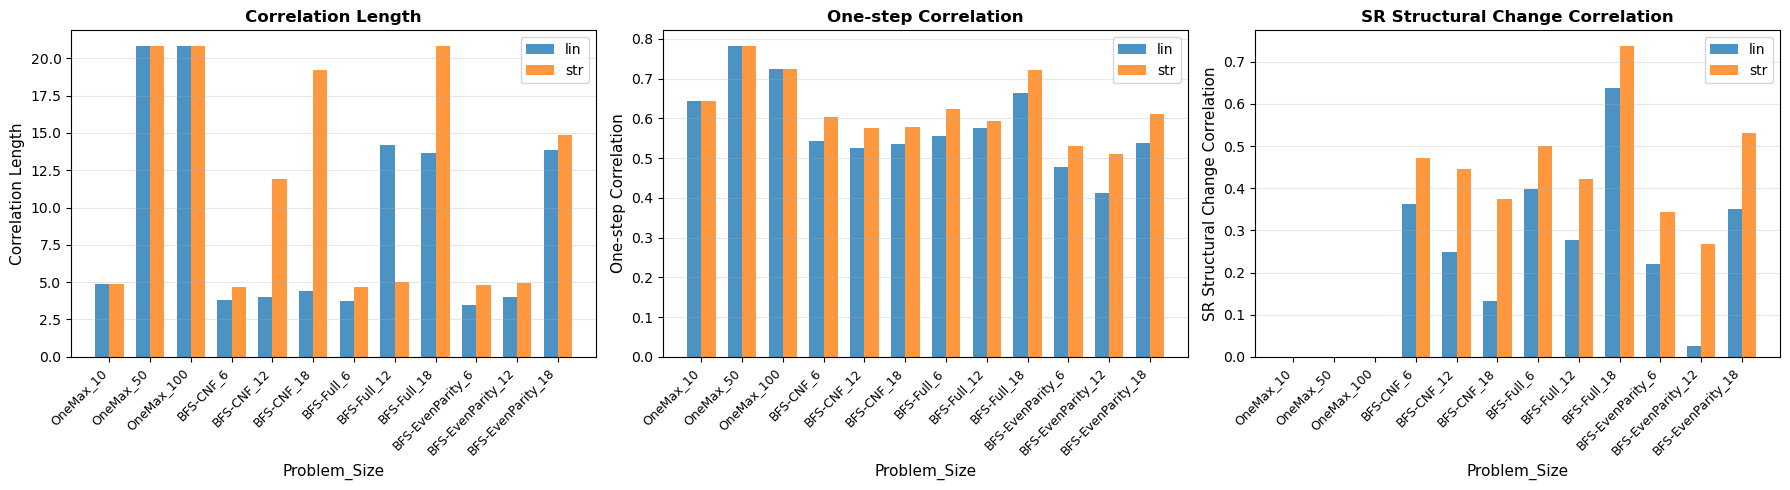

In [263]:
# Visualize the three key metrics with bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['cor_length', 'onestep_cor', 'sr_structural_change_cor']
metric_labels = ['Correlation Length', 'One-step Correlation', 'SR Structural Change Correlation']

# Prepare data for plotting
plot_data = correlation_summary.reset_index()

# Create x-axis labels combining problem and size
plot_data['problem_size'] = plot_data['problem'].astype(str) + '_' + plot_data['size'].astype(str)

# Get unique problem_size combinations in order
problem_sizes = plot_data['problem_size'].unique()

# Set up bar positions
x = np.arange(len(problem_sizes))
width = 0.35

for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx]
    
    # Separate data by name_type
    lin_data = plot_data[plot_data['name_type'] == 'lin'].set_index('problem_size')[metric]
    str_data = plot_data[plot_data['name_type'] == 'str'].set_index('problem_size')[metric]
    
    # Align data with problem_sizes order
    lin_values = [lin_data.get(ps, 0) for ps in problem_sizes]
    str_values = [str_data.get(ps, 0) for ps in problem_sizes]
    
    # Create bars
    ax.bar(x - width/2, lin_values, width, label='lin', alpha=0.8)
    ax.bar(x + width/2, str_values, width, label='str', alpha=0.8)
    
    # Formatting
    ax.set_xlabel('Problem_Size', fontsize=11)
    ax.set_ylabel(label, fontsize=11)
    ax.set_title(label, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(problem_sizes, rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/correlation_metrics_barplot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## Variogram

In [264]:
from skgstat import Variogram, MetricSpace

# model='exponential', 'spherical'
def make_variogram(dist_matrix, y, n_lags, model='spherical'):
    # copied from https://colab.research.google.com/drive/13rUkHW3DxhkRR6ZjujGjfvmp3N0U1hix

    n = len(y)
    dummy = np.random.random((n, 2)) # we will over-write                
    ms = MetricSpace(dummy) 
    ms._dists = dist_matrix

    # 3. ANALYSIS
    # Increasing n_lags helps capture the fine-grained scatter
    V = Variogram(
        coordinates=ms,
        values=y,
        n_lags=n_lags,
        model=model,
    )

    # 4. NORMALIZATION
    avg_dist = np.mean(V.distance)
    total_variance = np.var(y)

    # 6. OUTPUT STATS
    norm_corr_length = V.parameters[0] / avg_dist
    return avg_dist, total_variance, norm_corr_length, V.parameters[2], V


def plot_variogram(V, avg_dist, total_variance, ax):
    """Plot a single variogram in the given axes"""
    x_dots_norm = V.bins / avg_dist
    y_dots_corr = 1 - (V.experimental / total_variance)

    # Generate smooth curve for X[0, 2]
    x_smooth_raw = np.linspace(1e-9, avg_dist * 2, 100)
    x_smooth_norm = x_smooth_raw / avg_dist
    y_smooth_corr = 1 - (V.fitted_model(x_smooth_raw) / total_variance)

    # Plot the bunched points from all walks
    ax.scatter(x_dots_norm, y_dots_corr, color='firebrick', s=15, alpha=0.6,
                edgecolors='black', linewidth=0.3)

    # Plot the interpolating trend line
    ax.plot(x_smooth_norm, y_smooth_corr, color='royalblue', linewidth=2,
            label='Fitted')

    # Formatting
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black', lw=1, alpha=0.3)
    ax.axvline(1, color='forestgreen', linestyle='--', alpha=0.5)
    ax.grid(True, linestyle=':', alpha=0.3)

In [265]:
# Find all distance matrix files (*.npy, not *_fitness.npy)
dist_matrix_files = [f for f in glob.glob('outputs/results_2026_01_07_correlogram_xy_*.npy') 
                     if not f.endswith('_fitness.npy')]
print(f"Found {len(dist_matrix_files)} distance matrix files")

# Parse filenames to get metadata
variogram_data = []
for dist_file in dist_matrix_files:
    filename = Path(dist_file).stem
    # Extract parts from filename
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Parse: {problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_{generator}_rep{rep}
    try:
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        budget = int(parts[3])
        dist_type = parts[4]
        name_type = parts[5]
        generator = parts[6]
        rep = parts[7].replace('rep', '')
        
        # Construct fitness file path
        fitness_file = dist_file.replace('.npy', '_fitness.npy')
        
        variogram_data.append({
            'dist_file': dist_file,
            'fitness_file': fitness_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'generator': generator,
            'rep': rep
        })
    except Exception as e:
        print(f"Warning: Could not parse {filename}: {e}")

# Convert to DataFrame
variogram_df = pd.DataFrame(variogram_data)
variogram_df['problem'] = pd.Categorical(variogram_df['problem'], categories=problem_ordering, ordered=True)
variogram_df = variogram_df.sort_values(['problem', 'size', 'dist_type', 'name_type'])

print(f"Successfully parsed {len(variogram_df)} files")
variogram_df.head()

Found 24 distance matrix files
Successfully parsed 24 files


dist_file  \
14  outputs/results_2026_01_07_correlogram_xy_OneM...   
6   outputs/results_2026_01_07_correlogram_xy_OneM...   
12  outputs/results_2026_01_07_correlogram_xy_OneM...   
7   outputs/results_2026_01_07_correlogram_xy_OneM...   
17  outputs/results_2026_01_07_correlogram_xy_OneM...   

                                         fitness_file problem  size size_cat  \
14  outputs/results_2026_01_07_correlogram_xy_OneM...  OneMax    10    small   
6   outputs/results_2026_01_07_correlogram_xy_OneM...  OneMax    10    small   
12  outputs/results_2026_01_07_correlogram_xy_OneM...  OneMax    50   medium   
7   outputs/results_2026_01_07_correlogram_xy_OneM...  OneMax    50   medium   
17  outputs/results_2026_01_07_correlogram_xy_OneM...  OneMax   100    large   

    budget dist_type name_type generator rep  
14   10000    coarse       lin   one-max   0  
6    10000    coarse       str   one-max   0  
12   50000    coarse       lin   one-max   0  
7    50000    coarse       str   one-max   0  
17  200000    coarse       lin   one-max   0

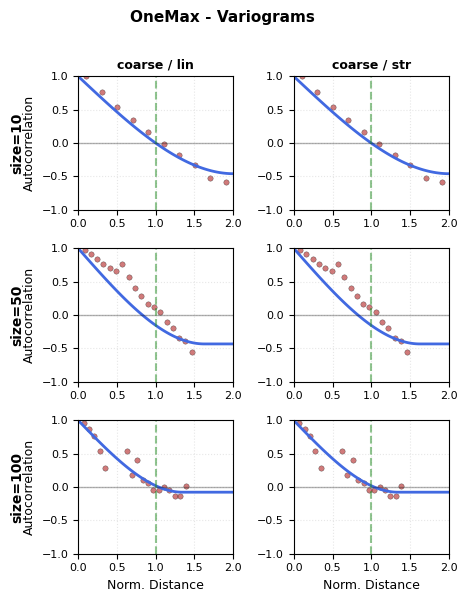

Created variogram grid for OneMax with 3 sizes: [10, 50, 100]


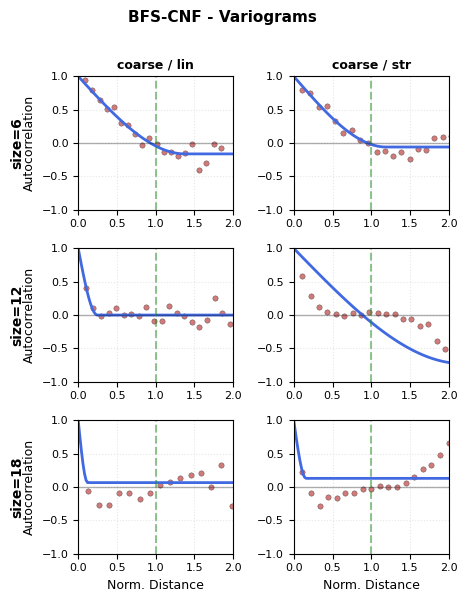

Created variogram grid for BFS-CNF with 3 sizes: [6, 12, 18]


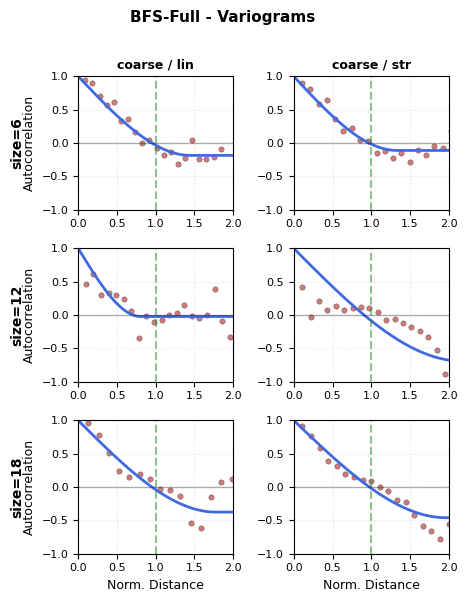

Created variogram grid for BFS-Full with 3 sizes: [6, 12, 18]


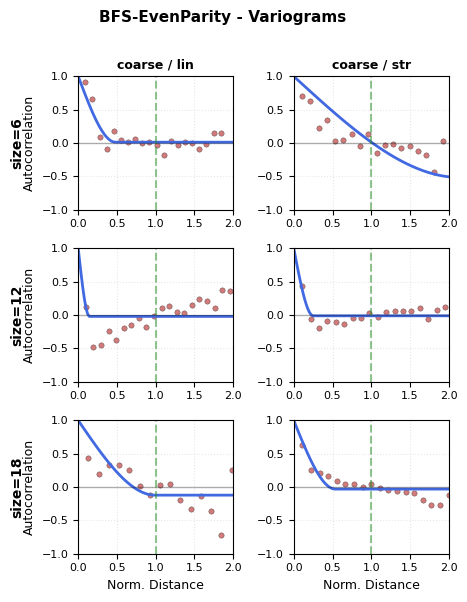

Created variogram grid for BFS-EvenParity with 3 sizes: [6, 12, 18]
Created variogram grids for 4 problems


In [266]:
# Generate variograms and create grid plots
# Parameters for variogram
N_LAGS = 20
MODEL = 'spherical'

# Get unique problems and combinations
problems = variogram_df['problem'].unique()
dist_types = sorted(variogram_df['dist_type'].unique())
name_types = sorted(variogram_df['name_type'].unique())

# Create column labels for all combinations of dist_type x name_type
columns = [(dt, nt) for dt in dist_types for nt in name_types]

# Create one grid per problem
for problem in problems:
    problem_df = variogram_df[variogram_df['problem'] == problem]
    
    if len(problem_df) == 0:
        continue
    
    # Get sizes that actually exist for this problem
    sizes = sorted(problem_df['size'].unique())
    
    # Determine grid dimensions
    n_rows = len(sizes)
    n_cols = len(columns)
    
    # Create figure with same size as correlogram grids
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2*n_rows))
    
    # Handle case of single row or column
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    fig.suptitle(f'{problem} - Variograms', fontsize=11, fontweight='bold', y=0.995)
    
    # Plot each cell
    for row_idx, size in enumerate(sizes):
        for col_idx, (dist_type, name_type) in enumerate(columns):
            ax = axes[row_idx, col_idx]
            
            # Find the matching file
            matching = problem_df[
                (problem_df['size'] == size) & 
                (problem_df['dist_type'] == dist_type) & 
                (problem_df['name_type'] == name_type)
            ]
            
            if len(matching) > 0:
                try:
                    # Load distance matrix and fitness values
                    dist_matrix = np.load(matching.iloc[0]['dist_file'])
                    fitness_vals = np.load(matching.iloc[0]['fitness_file'])
                    
                    # Generate variogram
                    avg_dist, total_variance, norm_corr_length, nugget, V = make_variogram(
                        dist_matrix, fitness_vals, N_LAGS, model=MODEL
                    )
                    
                    # Plot variogram
                    plot_variogram(V, avg_dist, total_variance, ax)
                    
                except Exception as e:
                    ax.text(0.5, 0.5, f'Error:\n{str(e)[:30]}', transform=ax.transAxes, 
                           ha='center', va='center', fontsize=7, color='red')
            else:
                ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                       ha='center', va='center', fontsize=8, color='gray')
            
            # Labels with appropriate font sizes
            if row_idx == n_rows - 1:
                ax.set_xlabel('Norm. Distance', fontsize=9)
            if col_idx == 0:
                ax.set_ylabel('Autocorrelation', fontsize=9)
            
            # Tick label sizes
            ax.tick_params(axis='both', labelsize=8)
            
            # Row labels (size)
            if col_idx == 0:
                ax.text(-0.35, 0.5, f'size={size}', transform=ax.transAxes,
                       fontsize=10, va='center', ha='right', fontweight='bold',
                       rotation=90)
            
            # Column labels (dist_type, name_type)
            if row_idx == 0:
                ax.set_title(f'{dist_type} / {name_type}', fontsize=9, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'outputs/variogram_grid_{problem}.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"Created variogram grid for {problem} with {len(sizes)} sizes: {sizes}")

print(f"Created variogram grids for {len(problems)} problems")

# Solver

In [267]:
# Read solver results
solver_df = pd.read_csv('outputs/results_2026_01_07_correlogram_solver.csv')

solver_df.head()

Unnamed: 0 problem  size size_cat             solver  budget dist_type  \
0           0  OneMax    10    small  genetic_algorithm   10000    coarse   
1           1  OneMax    10    small  genetic_algorithm   10000    coarse   
2           2  OneMax    10    small      random_search   10000    coarse   
3           3  OneMax    10    small       hill_climber   10000    coarse   
4           4  OneMax    10    small       hill_climber   10000    coarse   

  name_type generator  rep   elapsed  fx  norm_fx  geno_size  hist_len  \
0       lin   one-max    0  1.323478  10      1.0         10         4   
1       str   one-max    0  0.087074  10      1.0         10         4   
2       lin   one-max    0  0.022358  10      1.0         10       323   
3       lin   one-max    0  0.003455  10      1.0         10        72   
4       str   one-max    0  0.006966  10      1.0         10        72   

                            pheno  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   

                                                geno  
0  {'0': Dist(choice, ([0, 1],), {}, val=1), '1':...  
1  {'root/iter@(2,6):0/choice@(2,62)': Dist(choic...  
2  {'0': Dist(choice, ([0, 1],), {}, val=1), '1':...  
3  {'0': Dist(choice, ([0, 1],), {}, val=1), '1':...  
4  {'root/iter@(2,6):0/choice@(2,62)': Dist(choic...

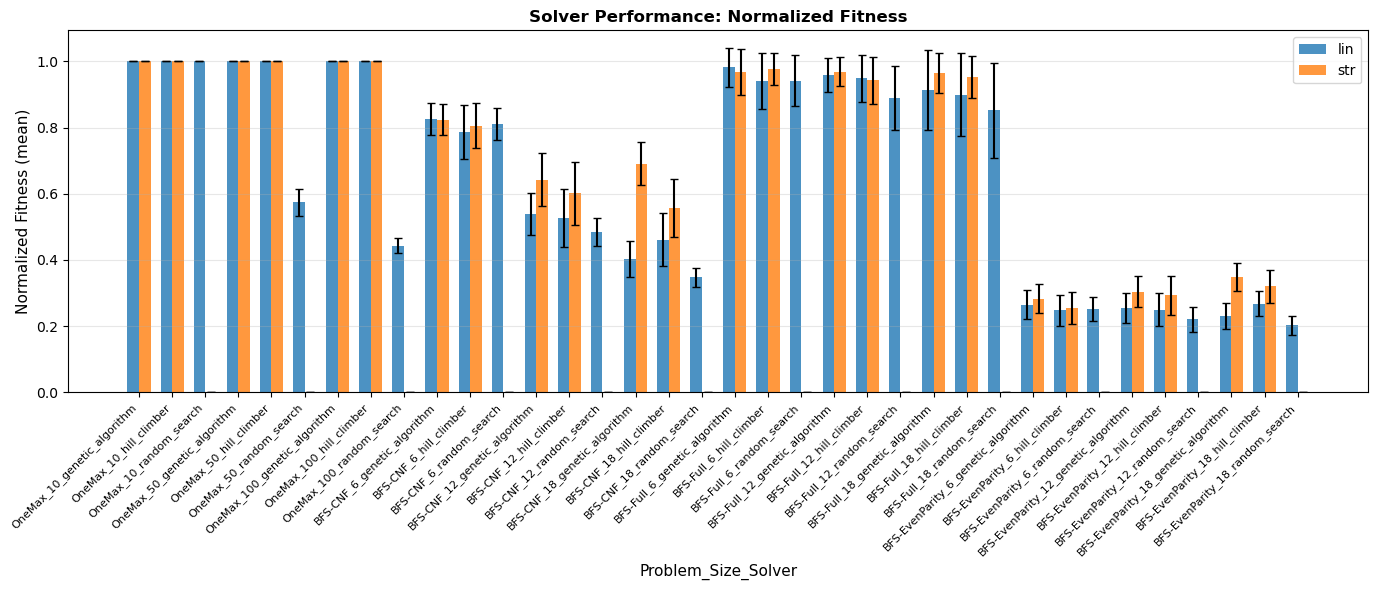

In [268]:
# Visualize solver performance using norm_fx
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Prepare data for plotting
plot_data = solver_summary.copy()

# Create x-axis labels combining problem, size, and solver
plot_data['problem_size_solver'] = (plot_data['problem'].astype(str) + '_' + 
                                     plot_data['size'].astype(str) + '_' + 
                                     plot_data['solver'])

# Get unique problem_size_solver combinations in order
problem_size_solvers = plot_data['problem_size_solver'].unique()

# Set up bar positions
x = np.arange(len(problem_size_solvers))
width = 0.35

# Separate data by name_type
lin_data = plot_data[plot_data['name_type'] == 'lin'].set_index('problem_size_solver')
str_data = plot_data[plot_data['name_type'] == 'str'].set_index('problem_size_solver')

# Align data with problem_size_solvers order
lin_values = [lin_data['norm_fx_mean'].get(ps, 0) for ps in problem_size_solvers]
lin_stds = [lin_data['norm_fx_std'].get(ps, 0) for ps in problem_size_solvers]
str_values = [str_data['norm_fx_mean'].get(ps, 0) for ps in problem_size_solvers]
str_stds = [str_data['norm_fx_std'].get(ps, 0) for ps in problem_size_solvers]

# Create bars with error bars
ax.bar(x - width/2, lin_values, width, label='lin', alpha=0.8, yerr=lin_stds, capsize=3)
ax.bar(x + width/2, str_values, width, label='str', alpha=0.8, yerr=str_stds, capsize=3)

# Formatting
ax.set_xlabel('Problem_Size_Solver', fontsize=11)
ax.set_ylabel('Normalized Fitness (mean)', fontsize=11)
ax.set_title('Solver Performance: Normalized Fitness', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(problem_size_solvers, rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/solver_norm_fx_barplot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [269]:
# Find all history CSV files
history_files = glob.glob('outputs/history_*.csv')
print(f"Found {len(history_files)} history files")

# Parse filenames to get metadata
# Format: history_{problem}_{size}_{size_cat}_{solver}_{budget}_{dist_type}_{name_type}_{generator}_{rep}.csv
# Problem: solver can be multi-word with underscores (hill_climber, random_search, genetic_algorithm)
history_data = []
for hist_file in history_files:
    filename = Path(hist_file).stem
    parts = filename.replace('history_', '').split('_')
    
    try:
        # Strategy: known solvers are multi-word, so check for them
        known_solvers = ['hill_climber', 'random_search', 'genetic_algorithm']
        
        # Find which solver it is by checking if parts contain known solver names
        solver = None
        solver_start_idx = None
        for i in range(len(parts)):
            # Try to match multi-word solvers
            for known_solver in known_solvers:
                solver_parts = known_solver.split('_')
                if parts[i:i+len(solver_parts)] == solver_parts:
                    solver = known_solver
                    solver_start_idx = i
                    break
            if solver:
                break
        
        if solver is None:
            print(f"Warning: Could not identify solver in {filename}")
            continue
        
        # Now we know where the solver is, we can parse the rest
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        # solver already identified
        solver_end_idx = solver_start_idx + len(solver.split('_'))
        budget = int(parts[solver_end_idx])
        dist_type = parts[solver_end_idx + 1]
        name_type = parts[solver_end_idx + 2]
        generator = parts[solver_end_idx + 3]
        rep = int(parts[solver_end_idx + 4])
        
        history_data.append({
            'file': hist_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'solver': solver,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'generator': generator,
            'rep': rep
        })
    except Exception as e:
        print(f"Warning: Could not parse {filename}: {e}")

# Convert to DataFrame
history_df = pd.DataFrame(history_data)
history_df['problem'] = pd.Categorical(history_df['problem'], categories=problem_ordering, ordered=True)
history_df = history_df.sort_values(['problem', 'size', 'solver', 'name_type', 'rep'])

print(f"Successfully parsed {len(history_df)} files")
print(f"Unique combinations: {len(history_df.groupby(['problem', 'size', 'solver', 'name_type']))}")
history_df.head()

Found 1200 history files
Successfully parsed 1200 files
Unique combinations: 60


file problem  size size_cat  \
735  outputs/history_OneMax_10_small_genetic_algori...  OneMax    10    small   
780  outputs/history_OneMax_10_small_genetic_algori...  OneMax    10    small   
855  outputs/history_OneMax_10_small_genetic_algori...  OneMax    10    small   
814  outputs/history_OneMax_10_small_genetic_algori...  OneMax    10    small   
706  outputs/history_OneMax_10_small_genetic_algori...  OneMax    10    small   

                solver  budget dist_type name_type generator  rep  
735  genetic_algorithm   10000    coarse       lin   one-max    0  
780  genetic_algorithm   10000    coarse       lin   one-max    1  
855  genetic_algorithm   10000    coarse       lin   one-max    2  
814  genetic_algorithm   10000    coarse       lin   one-max    3  
706  genetic_algorithm   10000    coarse       lin   one-max    4

Generating 60 fitness-vs-iteration plots...


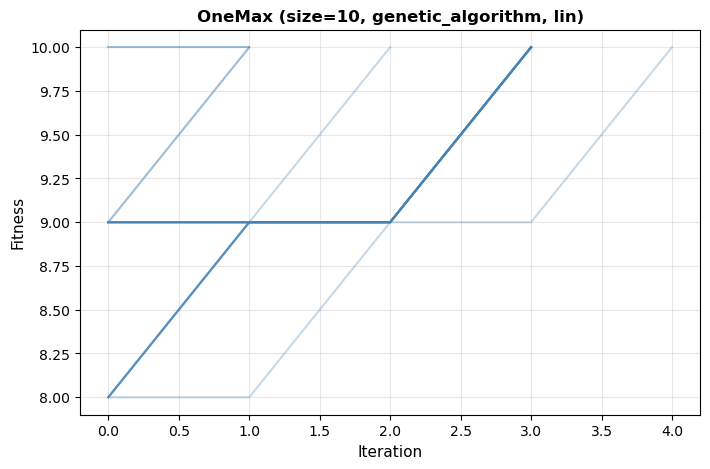

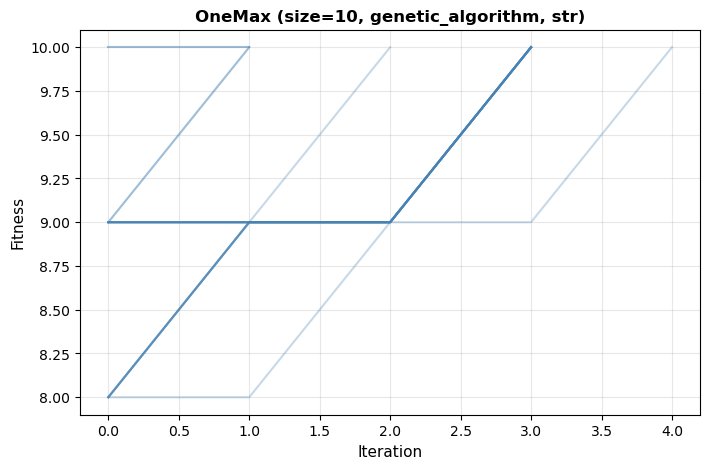

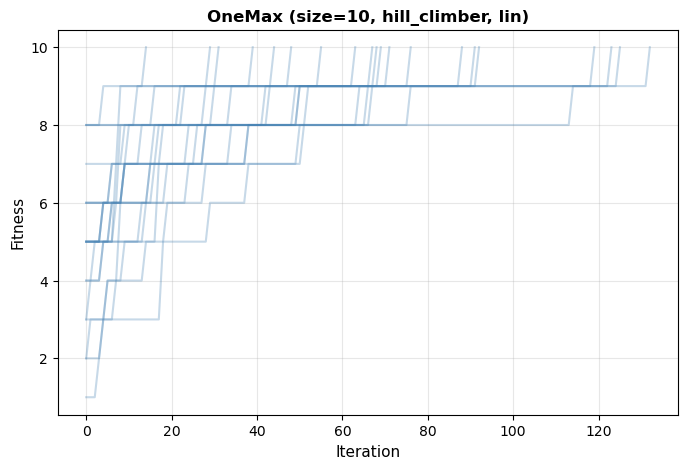

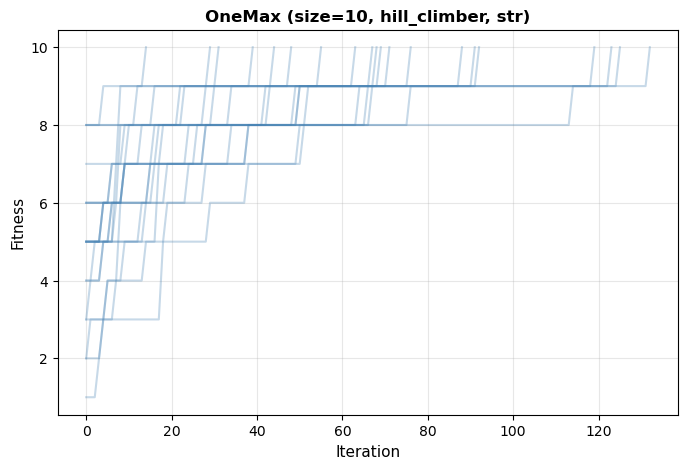

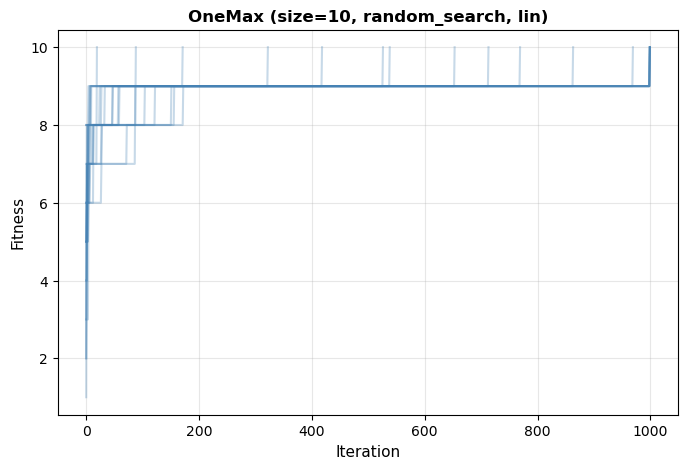

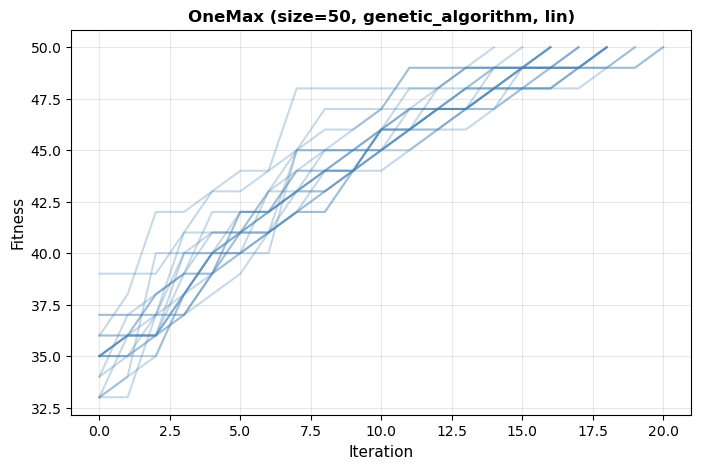

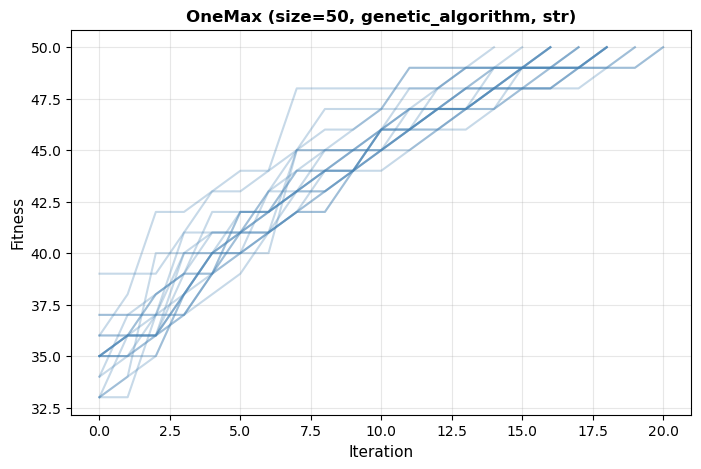

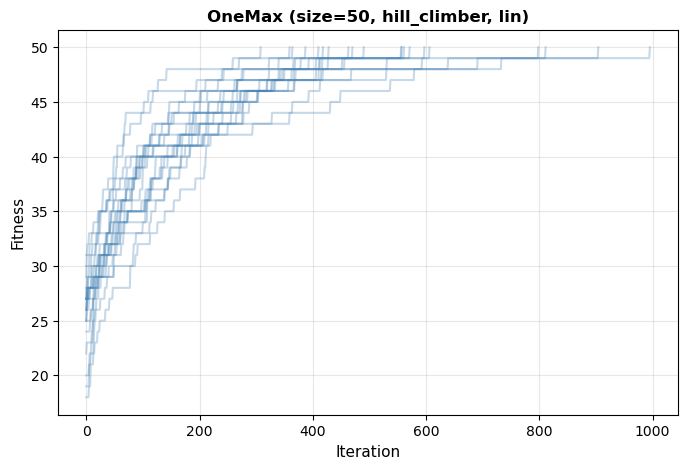

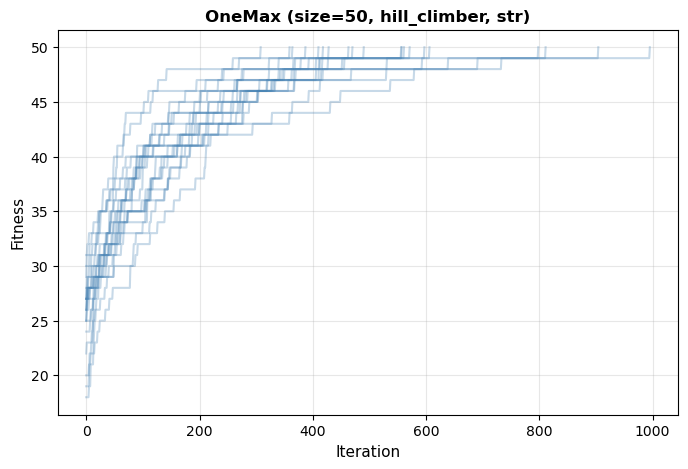

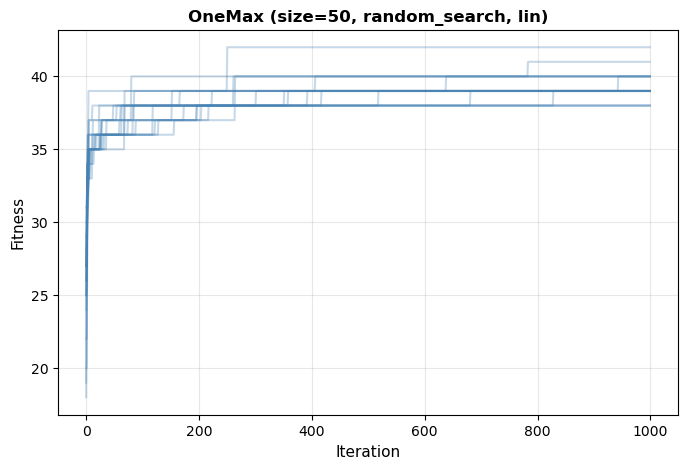

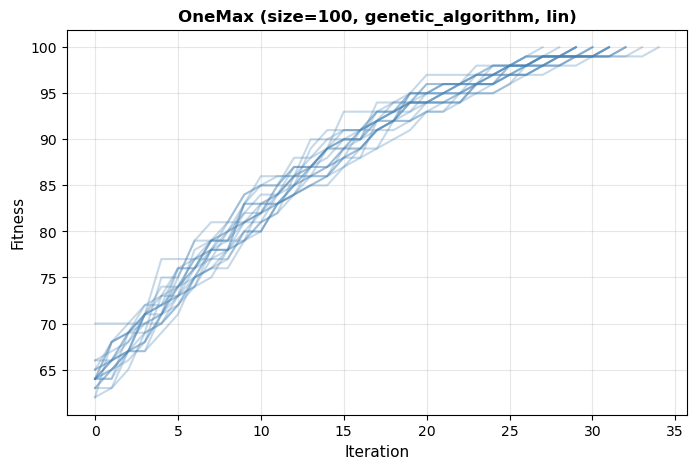

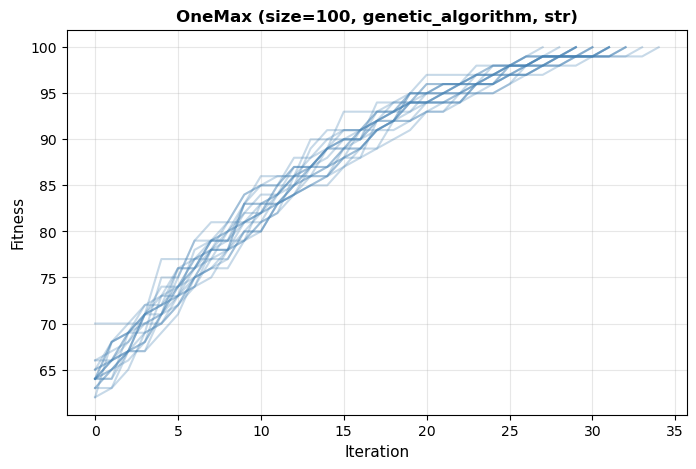

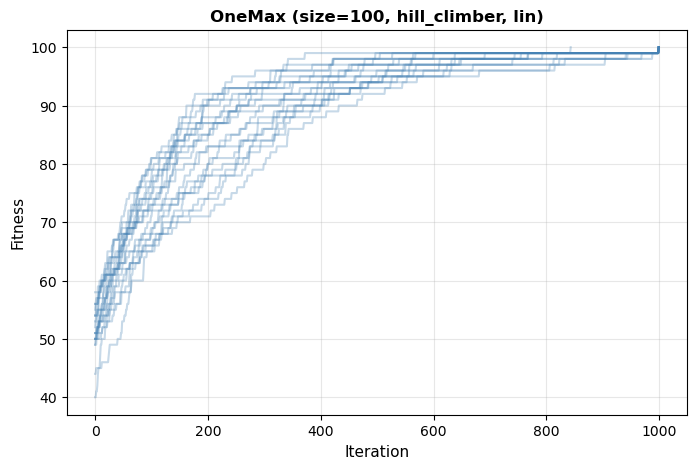

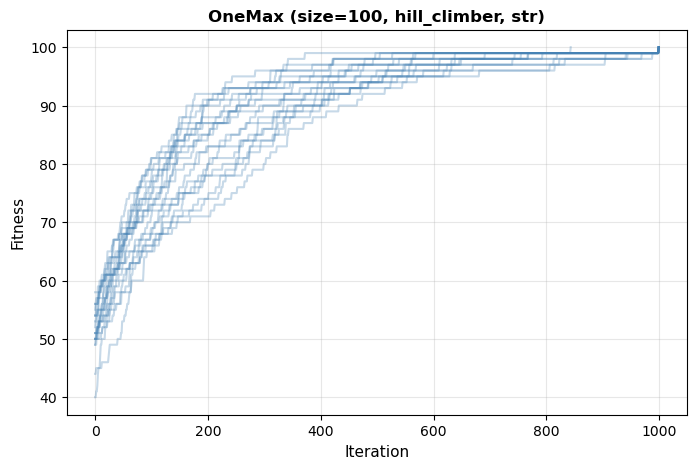

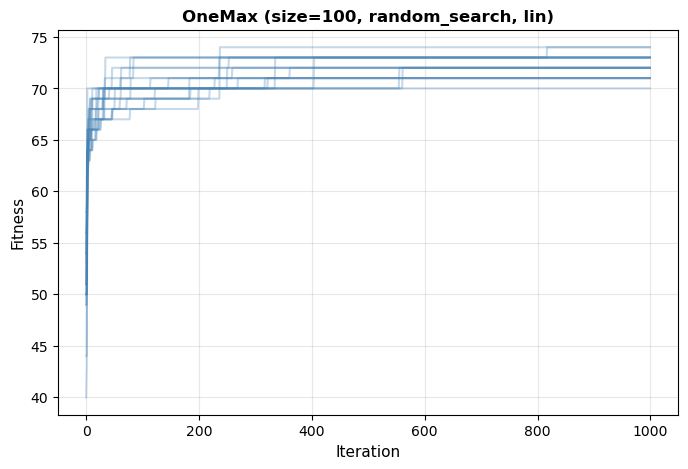

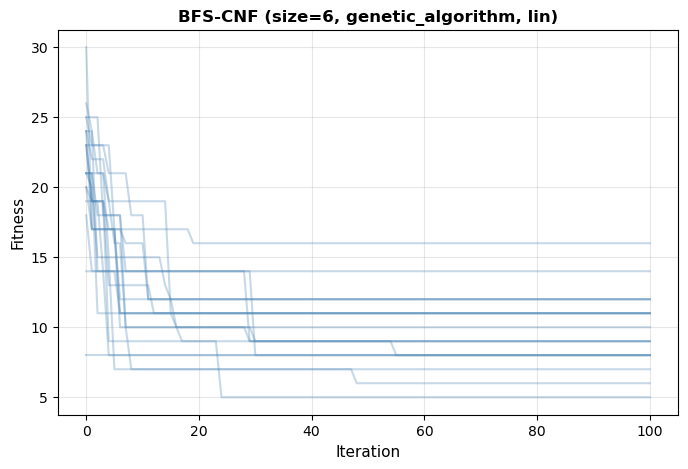

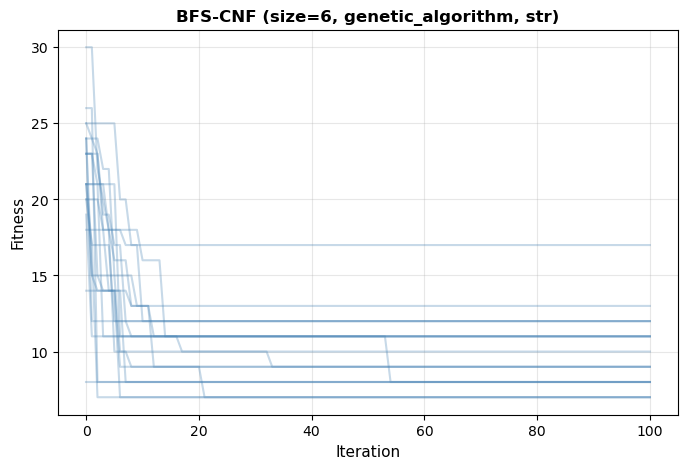

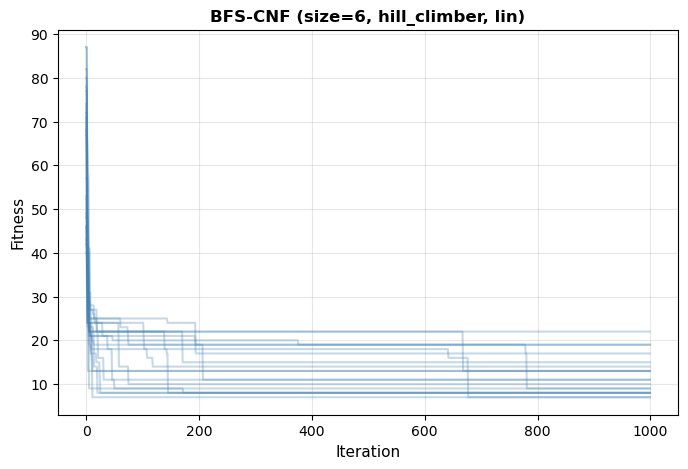

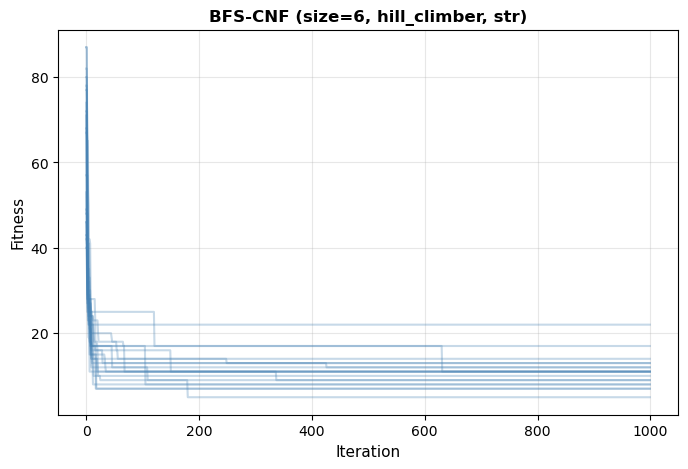

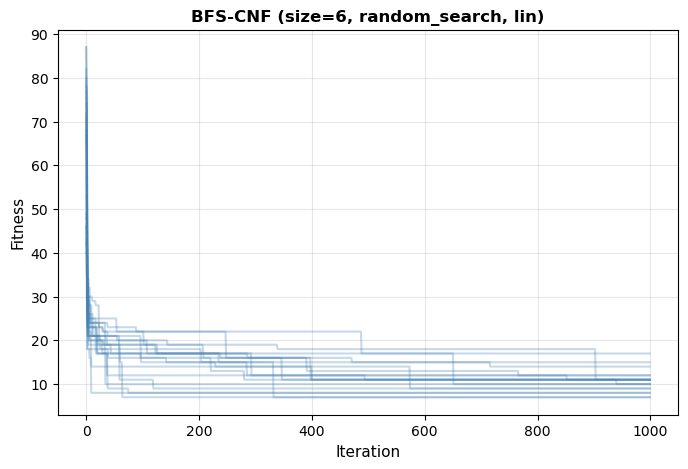

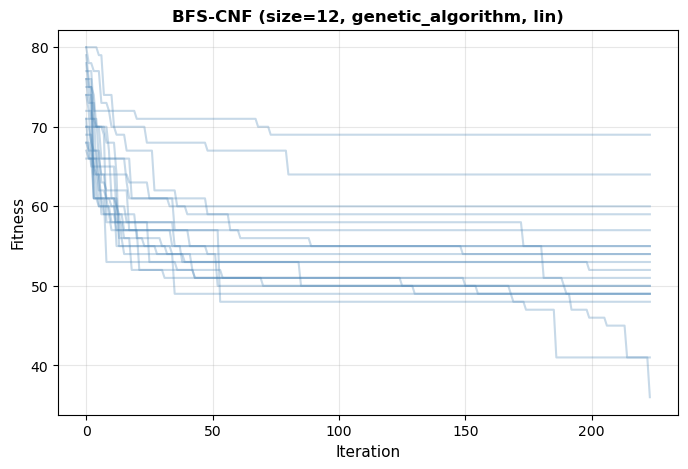

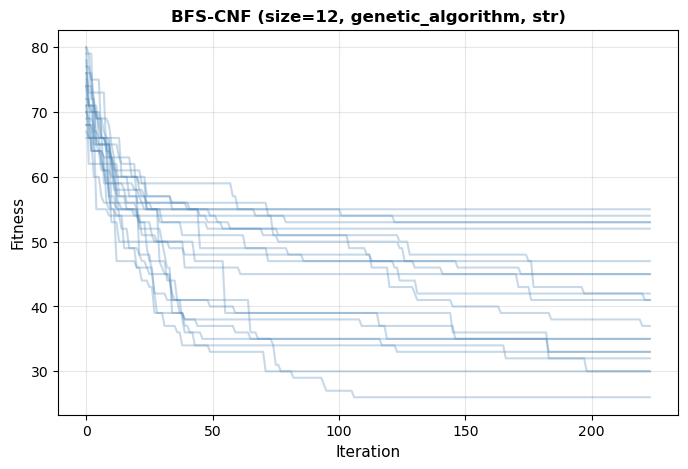

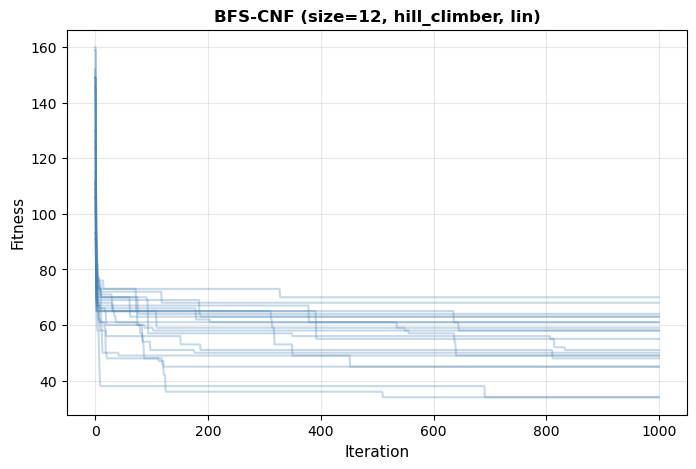

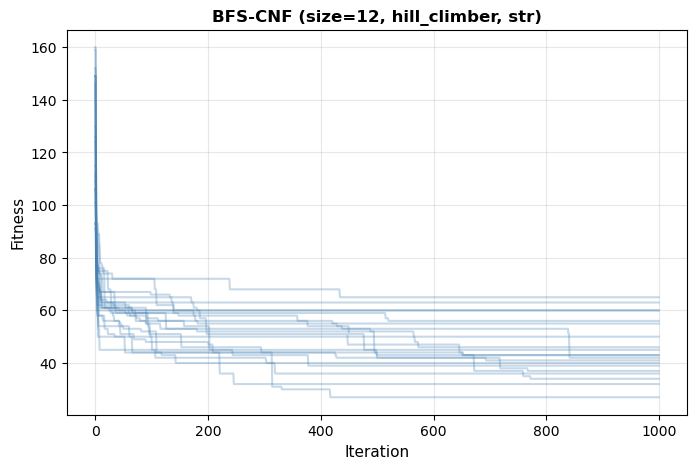

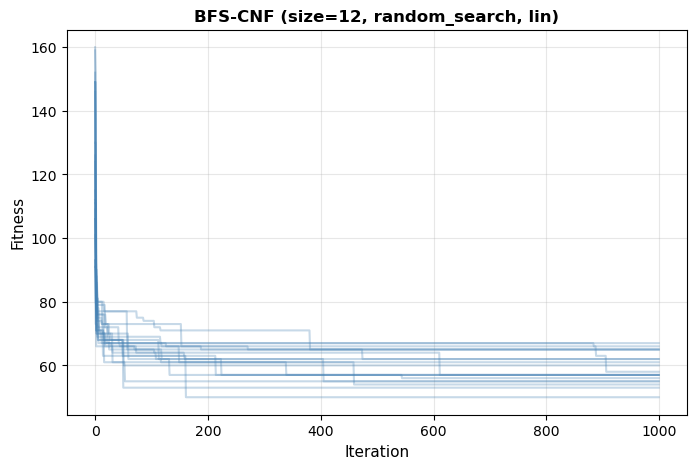

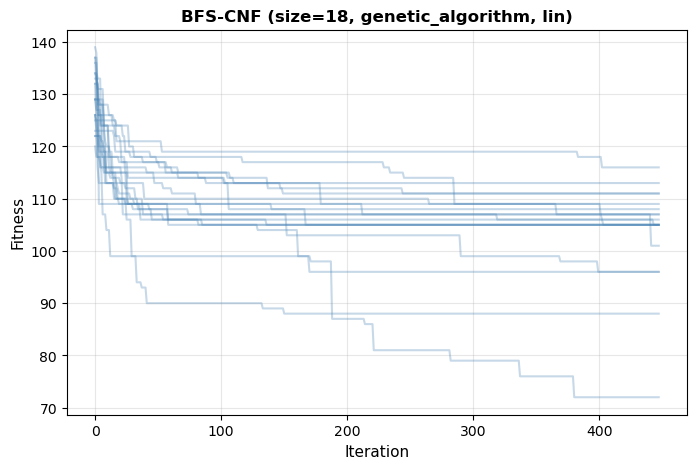

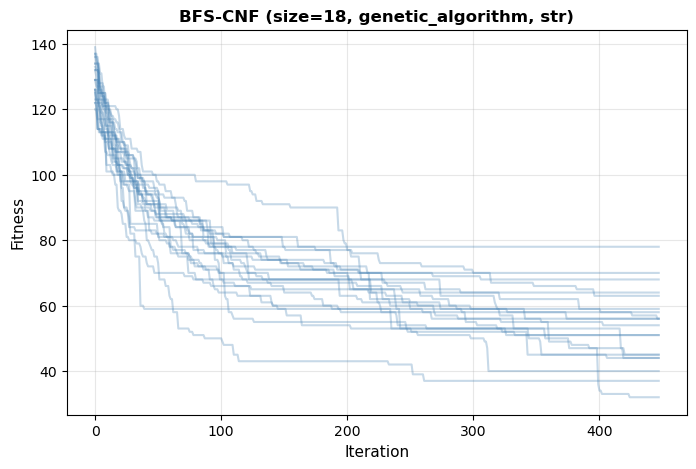

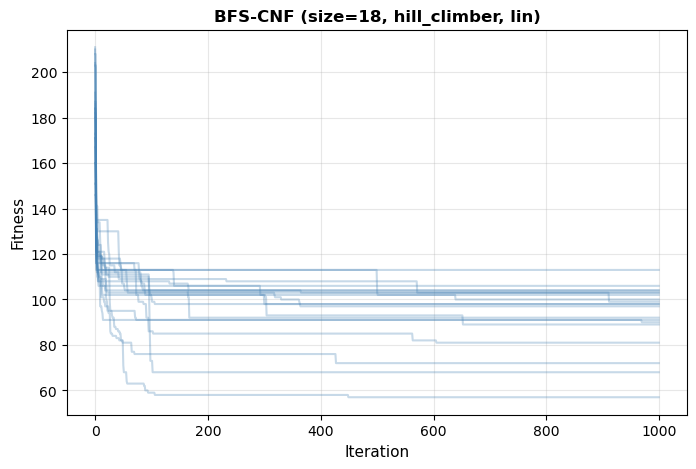

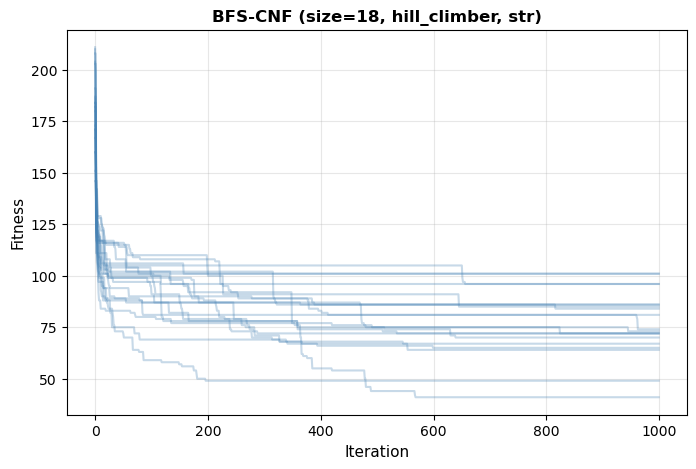

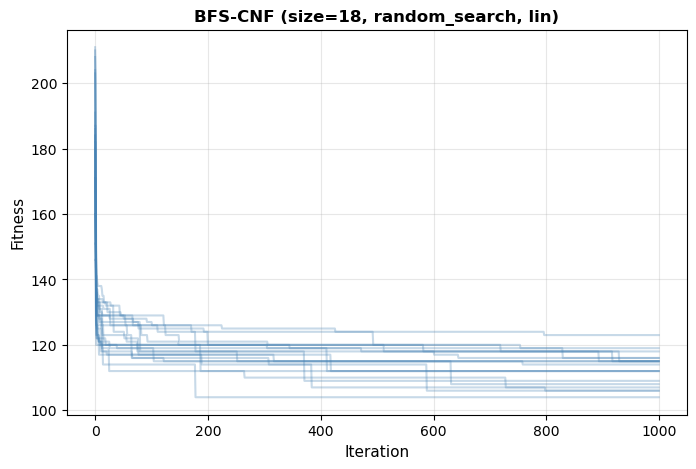

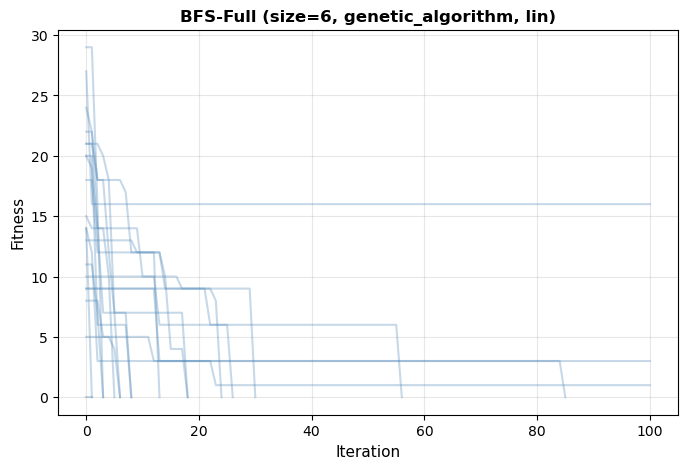

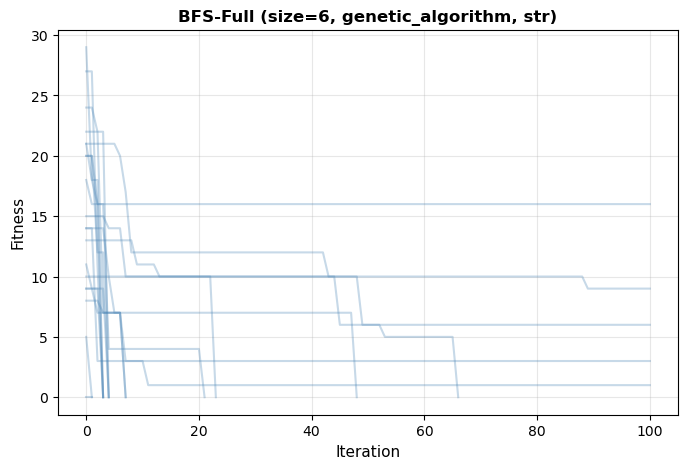

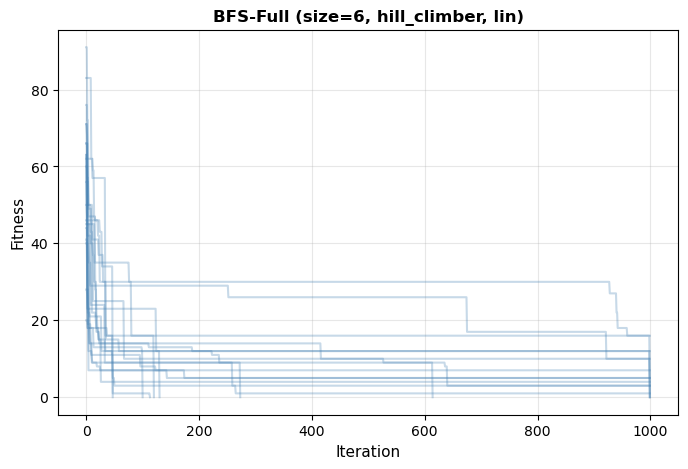

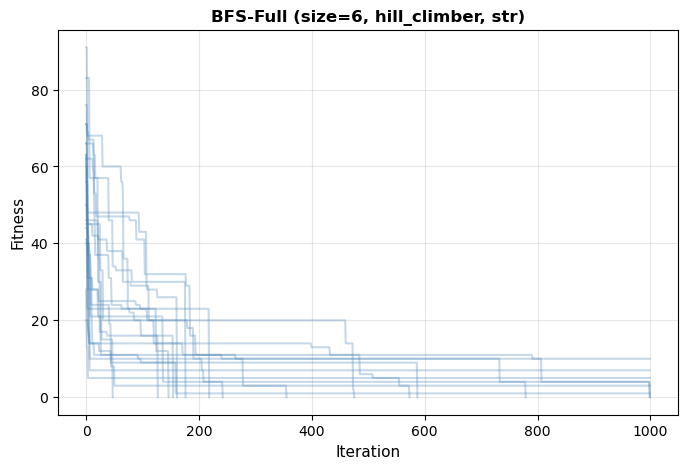

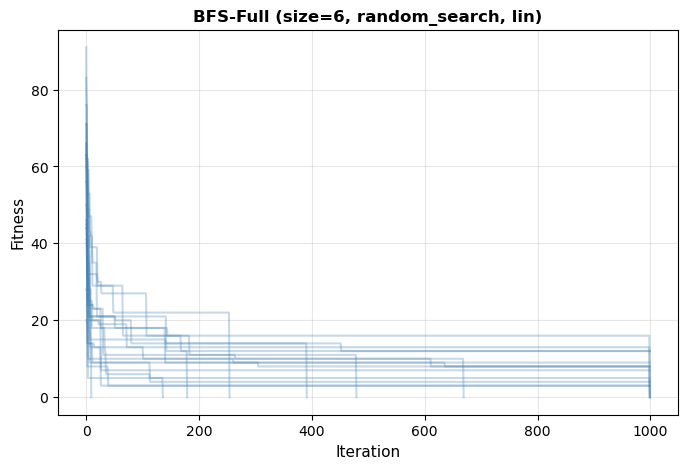

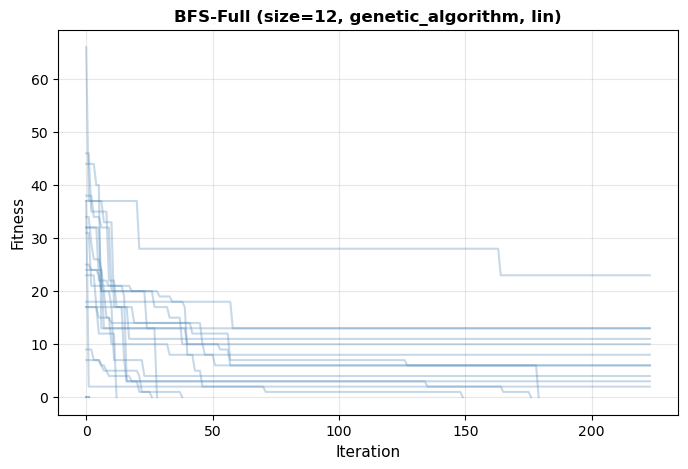

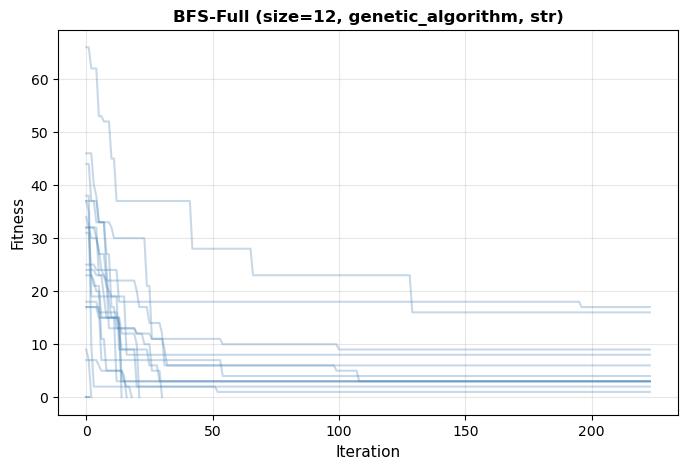

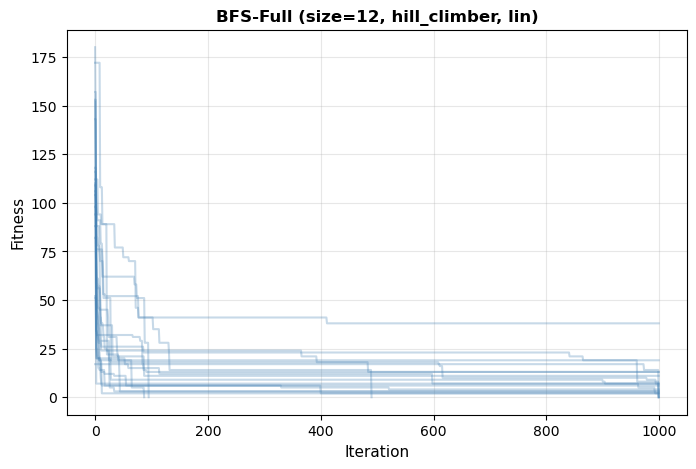

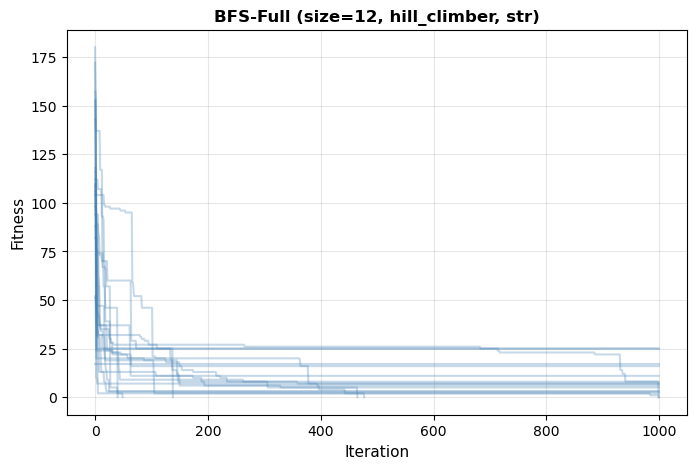

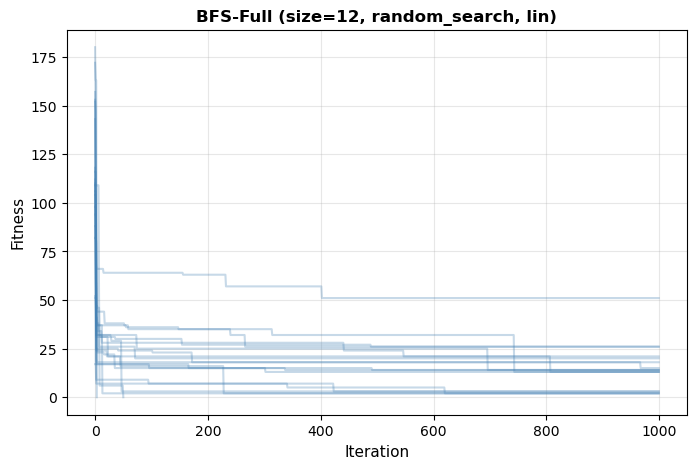

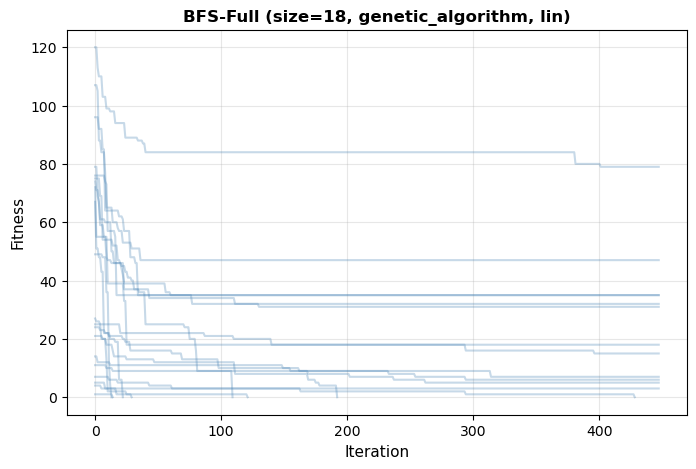

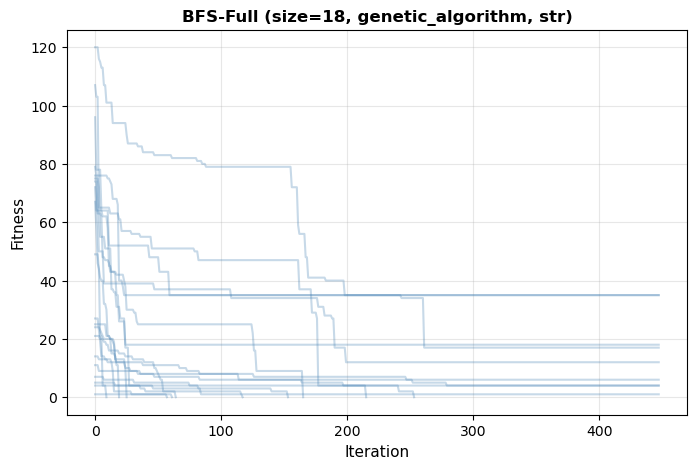

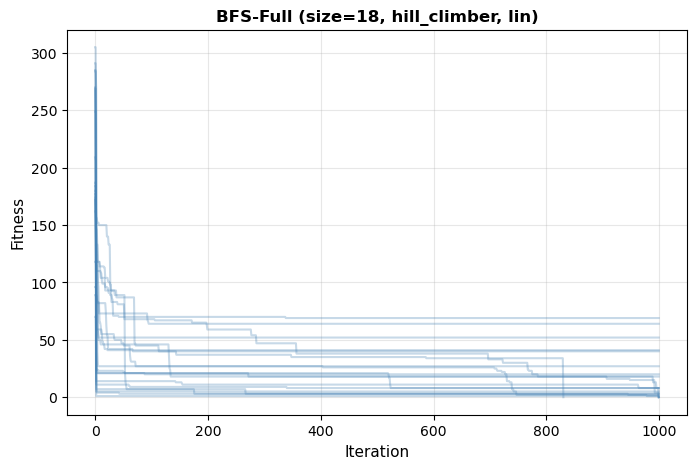

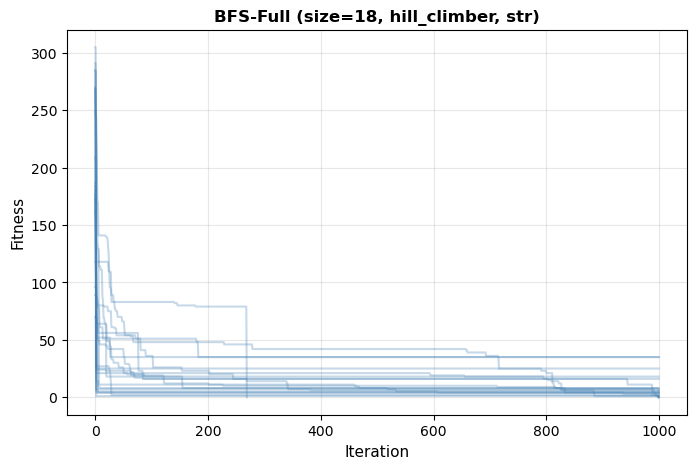

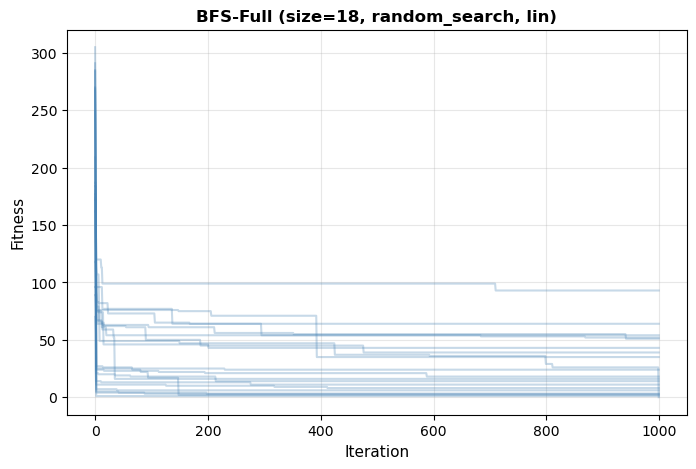

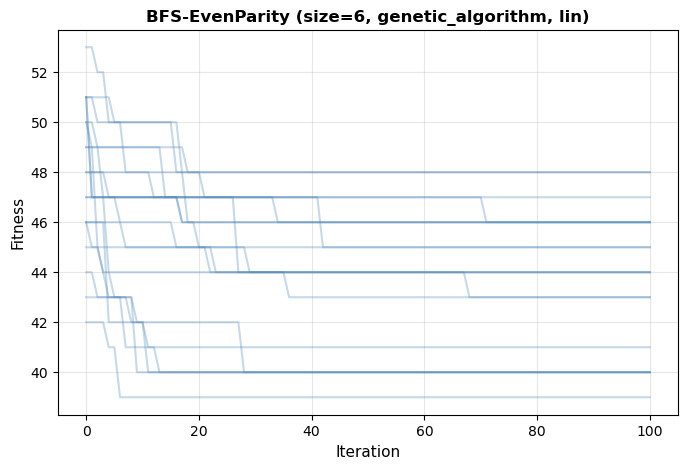

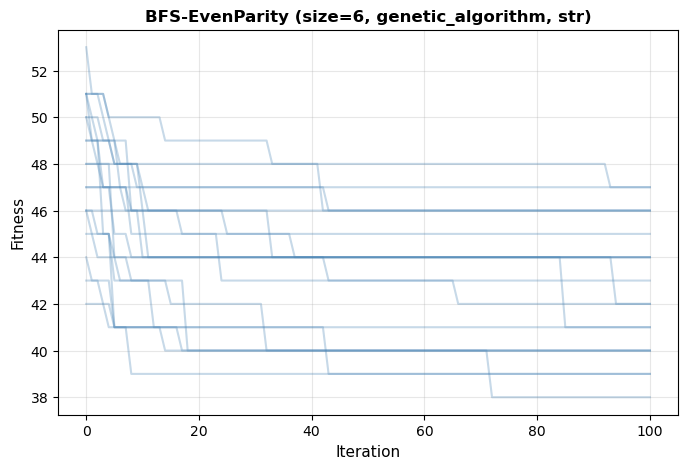

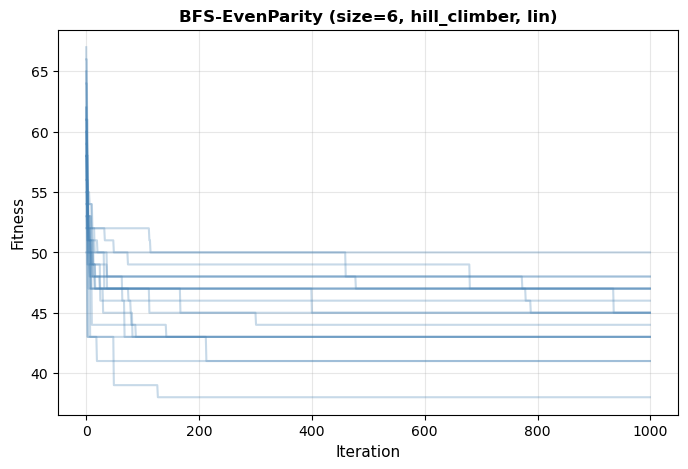

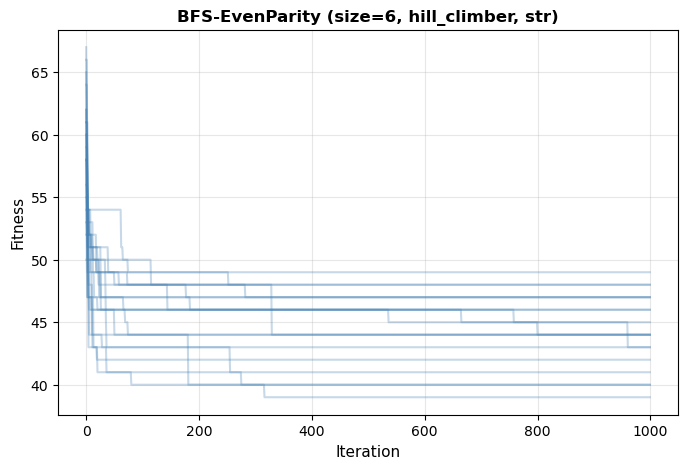

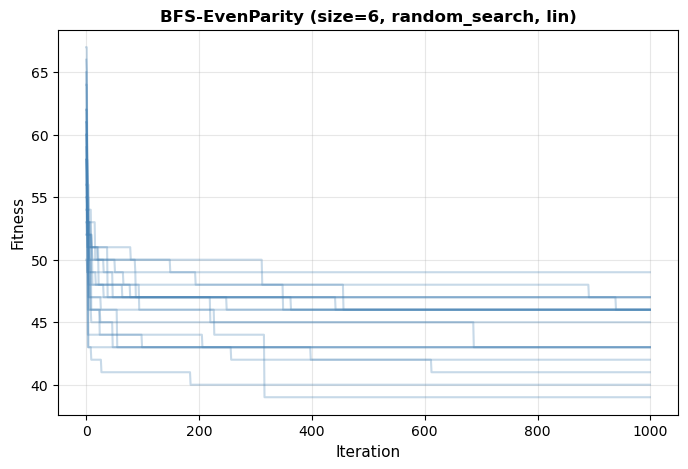

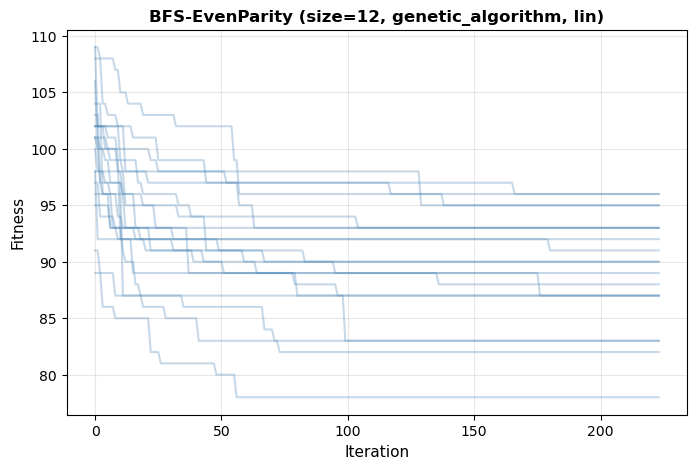

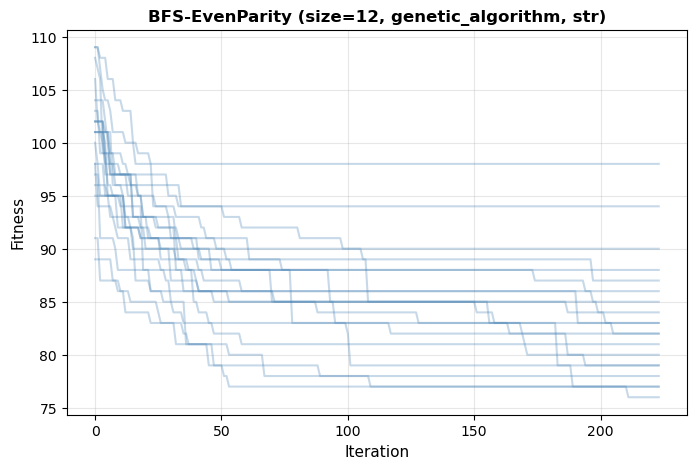

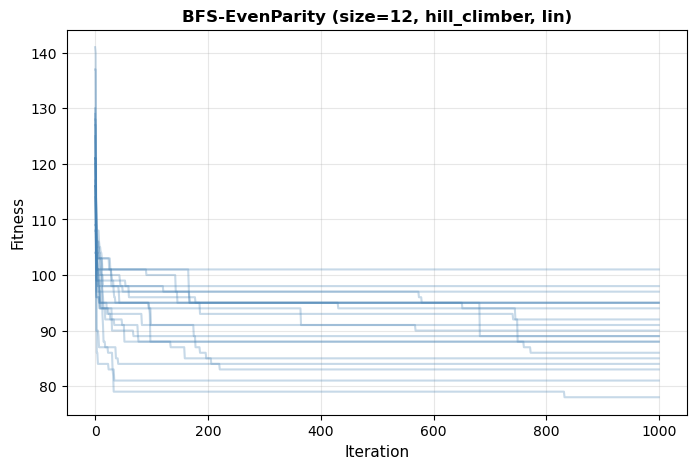

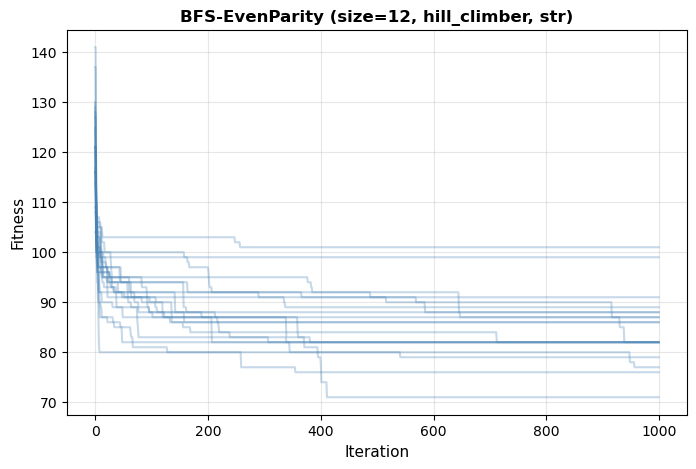

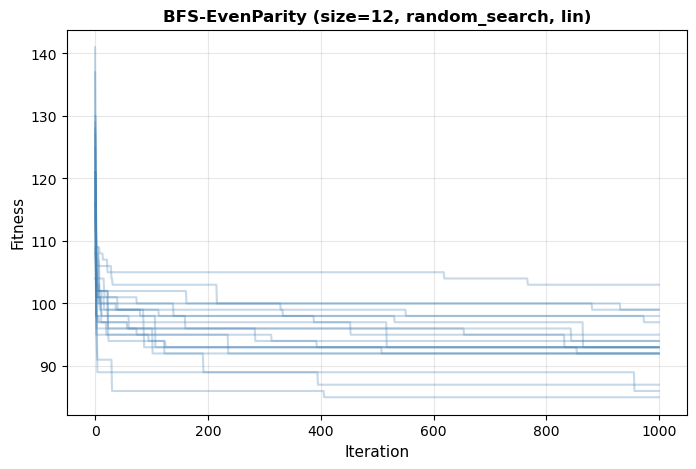

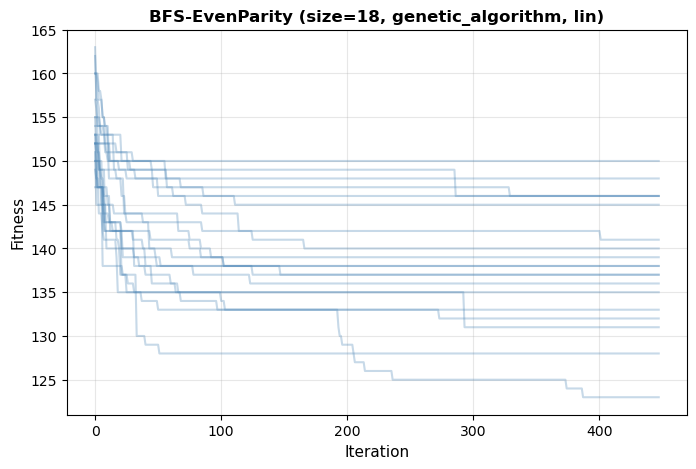

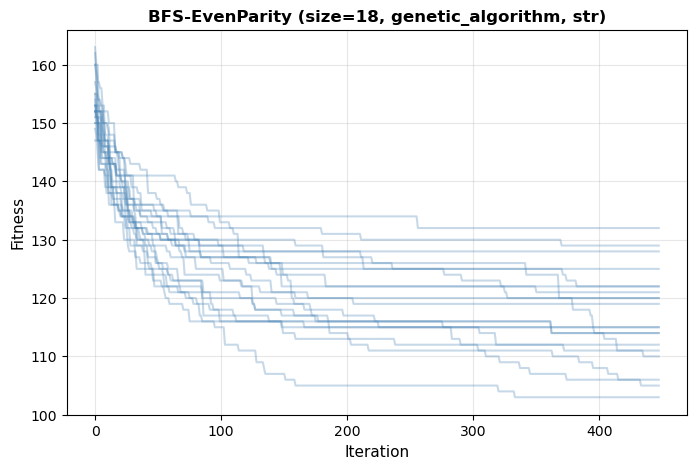

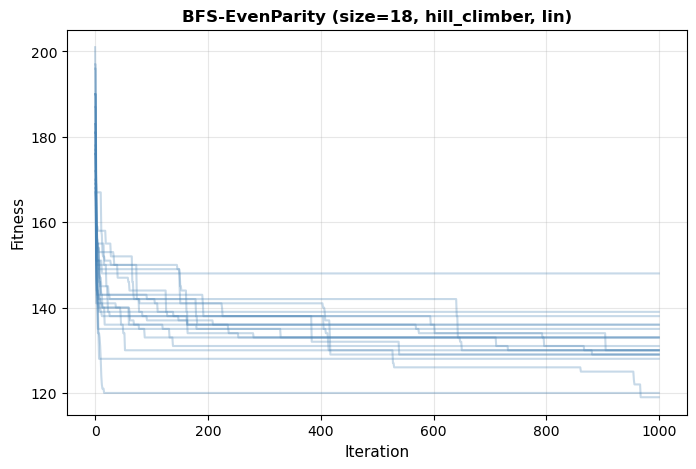

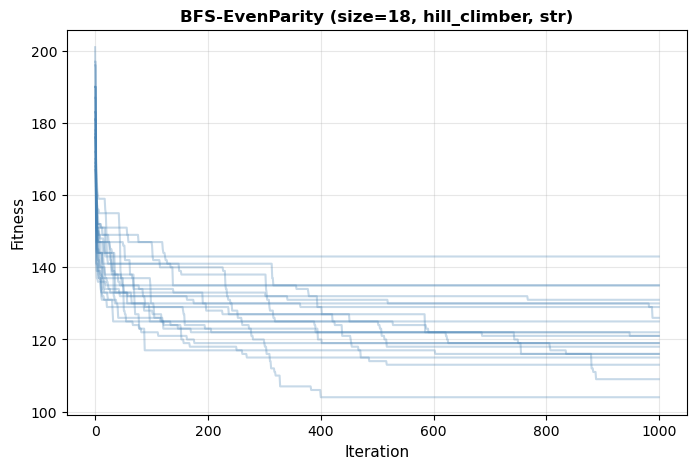

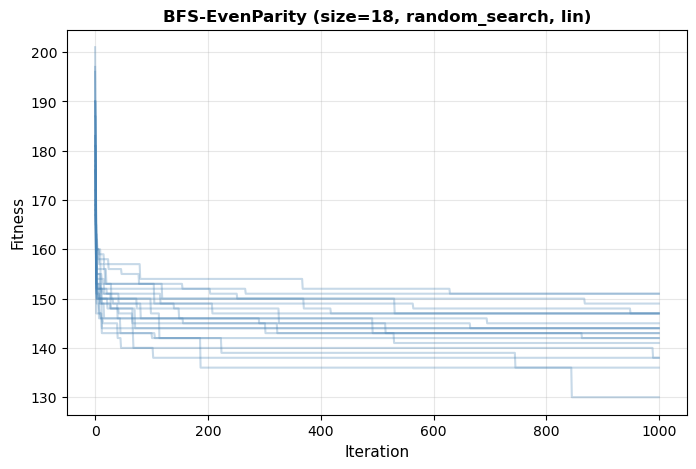

Created 60 fitness-vs-iteration plots


In [270]:
# Generate fitness-versus-iteration plots for each problem/size/solver/name_type combination
# Group by combination
grouped = history_df.groupby(['problem', 'size', 'solver', 'name_type'])

print(f"Generating {len(grouped)} fitness-vs-iteration plots...")

for (problem, size, solver, name_type), group in grouped:
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    # Plot each rep as a faint line
    for _, row in group.iterrows():
        try:
            # Read history file
            hist = pd.read_csv(row['file'])
            
            # Plot with transparency - slightly thicker lines
            ax.plot(hist.index, hist['fitness'], alpha=0.3, linewidth=1.5, color='steelblue')
            
        except Exception as e:
            print(f"Error reading {row['file']}: {e}")
    
    # Formatting
    ax.set_xlabel('Iteration', fontsize=11)
    ax.set_ylabel('Fitness', fontsize=11)
    ax.set_title(f'{problem} (size={size}, {solver}, {name_type})', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Save plot
    filename = f'outputs/fitness_history_{problem}_{size}_{solver}_{name_type}.pdf'
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()  # Display in notebook
    plt.close()

print(f"Created {len(grouped)} fitness-vs-iteration plots")

In [271]:
# Save solver summary table
solver_summary.to_csv('outputs/solver_summary_table.csv')
print("Solver summary table saved to outputs/solver_summary_table.csv")

# Export to LaTeX
latex_str = solver_summary.to_latex(float_format="%.3f", index=False)
with open('outputs/solver_summary_table.tex', 'w') as f:
    f.write(latex_str)
print("Solver summary table saved to outputs/solver_summary_table.tex")

Solver summary table saved to outputs/solver_summary_table.csv
Solver summary table saved to outputs/solver_summary_table.tex


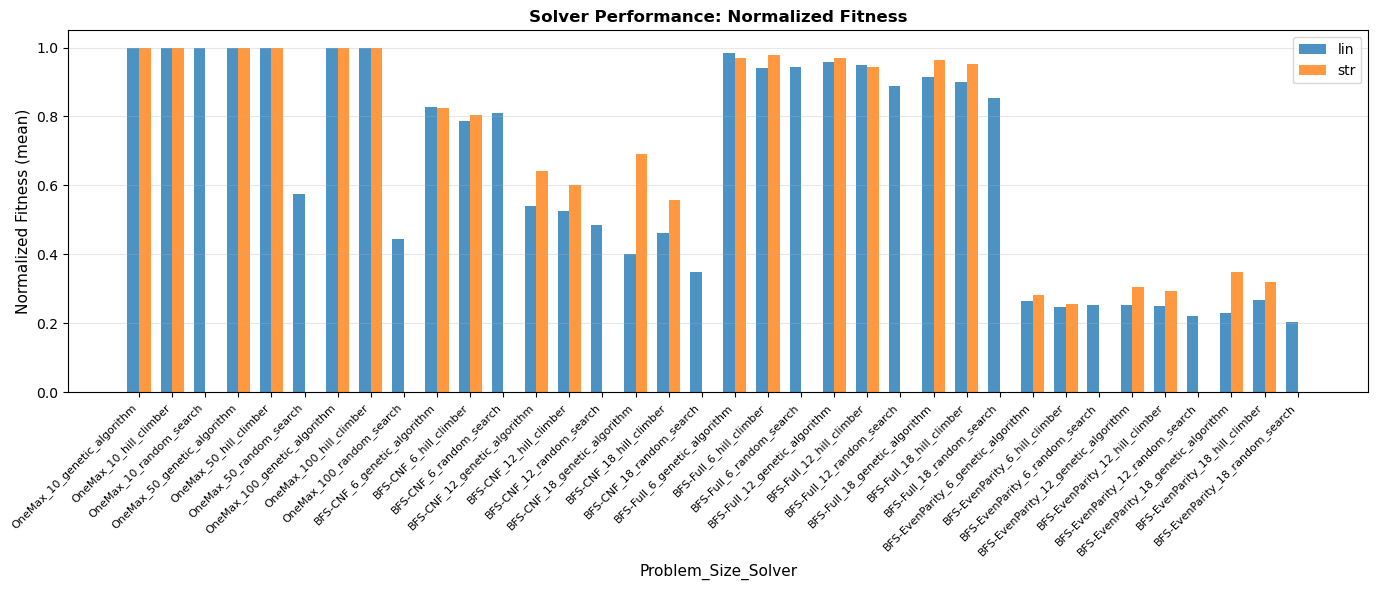

In [272]:
# Visualize solver performance using norm_fx
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Prepare data for plotting
plot_data = solver_summary.copy()

# Create x-axis labels combining problem, size, and solver
plot_data['problem_size_solver'] = (plot_data['problem'].astype(str) + '_' + 
                                     plot_data['size'].astype(str) + '_' + 
                                     plot_data['solver'])

# Get unique problem_size_solver combinations in order
problem_size_solvers = plot_data['problem_size_solver'].unique()

# Set up bar positions
x = np.arange(len(problem_size_solvers))
width = 0.35

# Separate data by name_type
lin_data = plot_data[plot_data['name_type'] == 'lin'].set_index('problem_size_solver')['norm_fx_mean']
str_data = plot_data[plot_data['name_type'] == 'str'].set_index('problem_size_solver')['norm_fx_mean']

# Align data with problem_size_solvers order
lin_values = [lin_data.get(ps, 0) for ps in problem_size_solvers]
str_values = [str_data.get(ps, 0) for ps in problem_size_solvers]

# Create bars
ax.bar(x - width/2, lin_values, width, label='lin', alpha=0.8)
ax.bar(x + width/2, str_values, width, label='str', alpha=0.8)

# Formatting
ax.set_xlabel('Problem_Size_Solver', fontsize=11)
ax.set_ylabel('Normalized Fitness (mean)', fontsize=11)
ax.set_title('Solver Performance: Normalized Fitness', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(problem_size_solvers, rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/solver_norm_fx_barplot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()